# Estructurando un Proyecto de DS (Parte II)

### Abstract

El conjunto de datos que se analiza en este estudio se centra en la reserva de hoteles y la probabilidad de que estas reservas sean canceladas. El dataset contiene información detallada sobre las reservas realizadas en distintos hoteles, incluyendo información sobre el tipo de habitación reservada, la duración de la estancia, la anticipación de la reserva, la fecha de llegada, la cantidad de personas y dias que reservan, entre otros datos.

- ¿Afecta el tipo de mercado el estado final de la reserva?

- ¿Existe relación entre el estado de la reserva y el tiempo de llegada al hotel?

- ¿Hay alguna época en particular en la que se realizan mayor cantidad de cancelaciones?

### Contexto y Problemática Comercial

#### Contexto Comercial y Analítico

El sector turístico es uno de los más importantes y dinámicos de la economía global, y los hoteles son una parte fundamental de esta industria. Los hoteles compiten en un mercado altamente competitivo, por lo que lograr realizar predicciones sobre la cancelación de las reservas realizadas pueden ayudarlos a mantenerse competitivos.

Los diferentes métodos de reserva que existen (y principalmente la reserva online) afectaron fuertemente el comportamiento de los clientes y sus posibilidades de reservas, muchas de las cuales luego son canceladas o no asistidas. Generalmente, el ofrecimiento de cancelaciones gratuitas o a un precio moderado/bajo ayuda a que los huespedes se vean beneficiados, pero conlleva a que los hoteles pierdan rentabilidad ya que para ellos esta metodología de cancelaciones es costosa.

#### Problemática


La cancelación de reservas es un problema común en la industria hotelera y puede afectar significativamente la rentabilidad del hotel. Estas cancelaciones pueden generar costos adicionales para el hotel, como la pérdida de ingresos por habitaciones no vendidas, gastos de cancelación y posibles daños a la reputación del hotel si el cliente queda insatisfecho.

Por lo tanto, es crucial para los hoteles gestionar eficazmente las cancelaciones de reservas para minimizar su impacto en la rentabilidad y la satisfacción del cliente.

Mediante este dataset se busca generar un modelo que ayude a la industria hotelera a gestionar las cancelaciones de las reservas. El dataset tiene mas de 36000 reservas analizadas y diferenciadas en canceladas y no canceladas, ademas de caracteristicas adicionales de las personas, la estadia y las reservas.

### Objetivo

El objetivo principal de este estudio es analizar la probabilidad de que las reservas de hotel sean canceladas y determinar qué factores pueden influir en esta decisión. Para lograr este objetivo, se llevaran a cabo varios análisis estadísticos y van a utilizarse diferentes técnicas de modelado predictivo que nos permitira generar un modelo de clasificación para predecir las posibilidades de que esto ocurra.

### Importación de Librerias

In [55]:
#Numpy
import numpy as np
from numpy import median
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns
# Sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Dataset

#### Importación y Lectura

#### Visualización

In [56]:
pd.set_option('display.max_columns', 500)

Link al dataset: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [57]:
hotel_orig = pd.read_csv('./ReservaHotel.csv')

In [58]:
hotel_orig.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [59]:
hotel_orig.shape

(36275, 19)

### Data Wrangling

In [60]:
hotel_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Las variables del dataset son:
- Booking_ID: ID de reserva.
- no_of_adults: número de adultos.
- no_of_children: número de niños.
- no_of_weekend_nights: número de noches de fin de semana reservado.
- no_of_week_nights: número de noches de dias de semana reservado.
- type_of_meal_plan: plan de alimentación elegido.
- required_car_parking_space: si requiere estacionamiento o no.
- room_type_reserved: tipo de habitación reservada.
- lead_time: cantidad de dias en que hace la reservación.
- arrival_year: año de llegada al hotel.
- arrival_month: mes de llegada al hotel.
- arrival_date: dia de llegada al hotel.
- market_segment_type: lugar desde el que se realizo la reserva.
- repeated_guest: si la persona que reserva ya habia reservado con anterioridad.
- no_of_previous_cancellations: cantidad de cancelaciones previas.
- no_of_previous_bookings_not_canceled: cantidad de reservas previas no canceladas.
- avg_price_per_room: precio promedio por habitación.
- no_of_special_requests: cantidad de pedidos especiales.
- booking_status: estado final de la reserva.

#### Datos faltantes

In [61]:
hotel_orig.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

El dataset no posee datos faltantes.

#### Primera Limpieza de Variables

Inicialmente la unica variable a eliminar sera el ID de reserva ya que es un dato irrelevante para el análisis.
Se generara un dataframe nuevo para mantener el original intacto.

In [62]:
hotel = hotel_orig.drop(columns=['Booking_ID'], axis=1)

In [63]:
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [64]:
hotel.describe(include="all")

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.595975,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.738941,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


#### Creación de Variable datetime ("Date")

In [65]:
hotel['Date'] = pd.to_datetime({'year':hotel['arrival_year'],
                              'month':hotel['arrival_month'],    
                              'day':hotel['arrival_date']
                              })

In [66]:
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Date
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11


In [67]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36275 non-null  int64         
 1   no_of_children                        36275 non-null  int64         
 2   no_of_weekend_nights                  36275 non-null  int64         
 3   no_of_week_nights                     36275 non-null  int64         
 4   type_of_meal_plan                     36275 non-null  object        
 5   required_car_parking_space            36275 non-null  int64         
 6   room_type_reserved                    36275 non-null  object        
 7   lead_time                             36275 non-null  int64         
 8   arrival_year                          36275 non-null  int64         
 9   arrival_month                         36275 non-null  int64         
 10

Para conocer el período de reservas que abarca el dataset realizamos lo siguiente:

In [68]:
max_fecha = hotel['Date'].max()
min_fecha = hotel['Date'].min()
print('Las reservas analizadas en el dataset van desde {} a {}'.format(min_fecha, max_fecha))

Las reservas analizadas en el dataset van desde 2017-07-01 00:00:00 a 2018-12-31 00:00:00


#### Nuevas Variables

Se crearan nuevas variables a partir de la unificación de varias columnas.

In [69]:
# unifico las variables de adults y children para ver el total de personas.
hotel['total_people'] = hotel['no_of_adults'] + hotel['no_of_children']

# unifico el numero de nights para ver su total
hotel['total_nights'] = hotel['no_of_weekend_nights'] + hotel['no_of_week_nights']

# unifico el numero de reservas anteriores
hotel['previous_booking'] = hotel['no_of_previous_bookings_not_canceled'] + hotel['no_of_previous_cancellations']

In [70]:
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Date,total_people,total_nights,previous_booking
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,2,3,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,2,5,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,1,3,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20,2,2,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11,2,2,0


In [71]:
hotel.shape

(36275, 22)

#### Transformación de variables categóricas a numéricas

In [72]:
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Date,total_people,total_nights,previous_booking
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled,2017-10-02,2,3,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled,2018-11-06,2,5,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled,2018-02-28,1,3,0
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled,2018-05-20,2,2,0
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled,2018-04-11,2,2,0


In [73]:
hotel.type_of_meal_plan.unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [74]:
map_meal = {'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3}
hotel["type_of_meal_plan"] = hotel["type_of_meal_plan"].replace(map_meal)
hotel["type_of_meal_plan"]  

0        1
1        0
2        1
3        1
4        0
        ..
36270    1
36271    1
36272    1
36273    0
36274    1
Name: type_of_meal_plan, Length: 36275, dtype: int64

In [75]:
hotel.room_type_reserved.unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [76]:
map_room = {'Room_Type 1': 1, 'Room_Type 4': 4, 'Room_Type 2': 2, 'Room_Type 6': 6,
       'Room_Type 5': 5, 'Room_Type 7': 7, 'Room_Type 3': 3}
hotel["room_type_reserved"] = hotel["room_type_reserved"].replace(map_room)
hotel["room_type_reserved"]

0        1
1        1
2        1
3        1
4        1
        ..
36270    4
36271    1
36272    1
36273    1
36274    1
Name: room_type_reserved, Length: 36275, dtype: int64

In [77]:
hotel.booking_status.unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [78]:
map_booking = {'Not_Canceled': 0, 'Canceled': 1}
hotel["booking_status"] = hotel["booking_status"].replace(map_booking)
hotel["booking_status"]

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

In [79]:
hotel_segment = pd.get_dummies(hotel["market_segment_type"], prefix="market")
hotel_segment.head()

,market_Aviation,market_Complementary,market_Corporate,market_Offline,market_Online
0,0,0,0,1,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [80]:
hotel = hotel.drop(["market_segment_type"], axis = 1)
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Date,total_people,total_nights,previous_booking
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,65.00,0,0,2017-10-02,2,3,0
1,2,0,2,3,0,0,1,5,2018,11,6,0,0,0,106.68,1,0,2018-11-06,2,5,0
2,1,0,2,1,1,0,1,1,2018,2,28,0,0,0,60.00,0,1,2018-02-28,1,3,0
3,2,0,0,2,1,0,1,211,2018,5,20,0,0,0,100.00,0,1,2018-05-20,2,2,0
4,2,0,1,1,0,0,1,48,2018,4,11,0,0,0,94.50,0,1,2018-04-11,2,2,0


In [81]:
hotel_concat = pd.concat([hotel, hotel_segment], axis = 1)
hotel = hotel_concat
hotel.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Date,total_people,total_nights,previous_booking,market_Aviation,market_Complementary,market_Corporate,market_Offline,market_Online
0,2,0,1,2,1,0,1,224,2017,10,2,0,0,0,65.00,0,0,2017-10-02,2,3,0,0,0,0,1,0
1,2,0,2,3,0,0,1,5,2018,11,6,0,0,0,106.68,1,0,2018-11-06,2,5,0,0,0,0,0,1
2,1,0,2,1,1,0,1,1,2018,2,28,0,0,0,60.00,0,1,2018-02-28,1,3,0,0,0,0,0,1
3,2,0,0,2,1,0,1,211,2018,5,20,0,0,0,100.00,0,1,2018-05-20,2,2,0,0,0,0,0,1
4,2,0,1,1,0,0,1,48,2018,4,11,0,0,0,94.50,0,1,2018-04-11,2,2,0,0,0,0,0,1


In [82]:
hotel.shape

(36275, 26)

In [83]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36275 non-null  int64         
 1   no_of_children                        36275 non-null  int64         
 2   no_of_weekend_nights                  36275 non-null  int64         
 3   no_of_week_nights                     36275 non-null  int64         
 4   type_of_meal_plan                     36275 non-null  int64         
 5   required_car_parking_space            36275 non-null  int64         
 6   room_type_reserved                    36275 non-null  int64         
 7   lead_time                             36275 non-null  int64         
 8   arrival_year                          36275 non-null  int64         
 9   arrival_month                         36275 non-null  int64         
 10

#### Cambio de tipos de variables

In [84]:
hotel.booking_status = hotel.booking_status.astype('object')

In [85]:
hotel.market_Aviation = hotel.market_Aviation.astype('object')
hotel.market_Complementary = hotel.market_Complementary.astype('object')
hotel.market_Corporate = hotel.market_Corporate.astype('object')
hotel.market_Offline = hotel.market_Offline.astype('object')
hotel.market_Online = hotel.market_Online.astype('object')

In [86]:
hotel.repeated_guest = hotel.repeated_guest.astype('object')
hotel.type_of_meal_plan = hotel.type_of_meal_plan.astype('object')
hotel.room_type_reserved = hotel.room_type_reserved.astype('object')
hotel.required_car_parking_space = hotel.required_car_parking_space.astype('object')

In [87]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36275 non-null  int64         
 1   no_of_children                        36275 non-null  int64         
 2   no_of_weekend_nights                  36275 non-null  int64         
 3   no_of_week_nights                     36275 non-null  int64         
 4   type_of_meal_plan                     36275 non-null  object        
 5   required_car_parking_space            36275 non-null  object        
 6   room_type_reserved                    36275 non-null  object        
 7   lead_time                             36275 non-null  int64         
 8   arrival_year                          36275 non-null  int64         
 9   arrival_month                         36275 non-null  int64         
 10

#### Gráficos descriptivos

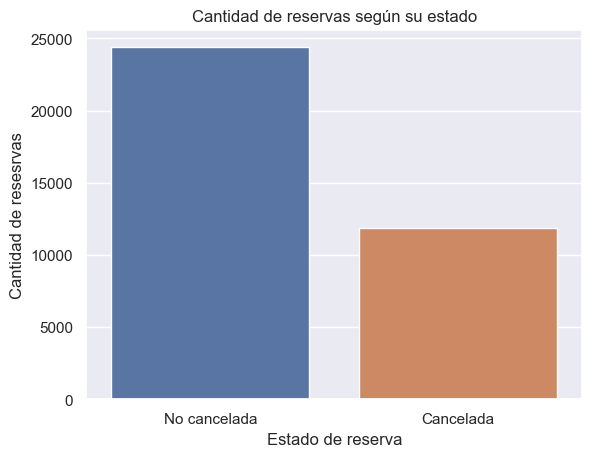

In [88]:
hs = sns.countplot(data=hotel, x= "booking_status", palette='deep')
hs.set_title('Cantidad de reservas según su estado')
labels = ('No cancelada', 'Cancelada')
hs.set_ylabel('Cantidad de resesrvas')
hs.set_xlabel('Estado de reserva')
hs.set_xticklabels(labels)
plt.show()

In [89]:
hotel['booking_status'].value_counts().mul(100)/len(hotel)

0    67.236389
1    32.763611
Name: booking_status, dtype: float64

*De acuerdo a lo observado, las reservas NO CANCELADAS alcanzan un total aproximado de 67%, mientras que las reservas CANCELADAS son de alrededor del 33%.*

Text(0.5, 1.0, 'Lead Time vs. Status')

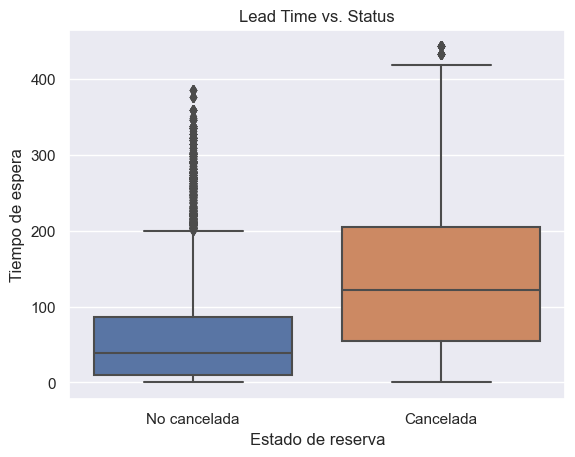

In [90]:
hl = sns.boxplot(x='booking_status', y='lead_time', data = hotel)
sns.set(font_scale=1)
hl.set_ylabel('Tiempo de espera')
hl.set_xlabel('Estado de reserva')
hl.set_xticklabels(labels)
plt.title("Lead Time vs. Status")

In [91]:
hotel['lead_time'].describe()

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64

*En función de lo que visualizamos, podemos determinar que a mayor cantidad de dias de espera para el arribo al hotel, mayor es la tasa de cancelaciones, llegando incluso a visualizar "outliers" con valores mayores a 400 dias. Sin embargo, hay reservas con tiempos de espera menores a esa cantidad que no fueron canceladas*

#### Revisión de tipos de variables

In [92]:
hotel.dtypes

no_of_adults                                     int64
no_of_children                                   int64
no_of_weekend_nights                             int64
no_of_week_nights                                int64
type_of_meal_plan                               object
required_car_parking_space                      object
room_type_reserved                              object
lead_time                                        int64
arrival_year                                     int64
arrival_month                                    int64
arrival_date                                     int64
repeated_guest                                  object
no_of_previous_cancellations                     int64
no_of_previous_bookings_not_canceled             int64
avg_price_per_room                             float64
no_of_special_requests                           int64
booking_status                                  object
Date                                    datetime64[ns]
total_peop

Armare 2 dataframes de acuerdo al tipo de variable a analizar, uno con las variables cualitativas y otra con las variables cuantitativas.

#### Variables Cuantitativas

In [93]:
hotel_cuant = hotel.select_dtypes(include = np.number)
hotel_cuant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   lead_time                             36275 non-null  int64  
 5   arrival_year                          36275 non-null  int64  
 6   arrival_month                         36275 non-null  int64  
 7   arrival_date                          36275 non-null  int64  
 8   no_of_previous_cancellations          36275 non-null  int64  
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 10  avg_price_per_room                    36275 non-null  float64
 11  no_of_special_r

In [94]:
hotel_cuant.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,lead_time,arrival_year,arrival_month,arrival_date,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,total_people,total_nights,previous_booking
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,85.232557,2017.820427,7.423653,15.595975,0.023349,0.153411,103.423539,0.619655,1.950241,3.015024,0.176761
std,0.518715,0.402648,0.870644,1.410905,85.930817,0.383836,3.069894,8.738941,0.368331,1.754171,35.089424,0.786236,0.650327,1.786017,1.953903
min,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,80.300000,0.000000,2.000000,2.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,99.450000,0.000000,2.000000,3.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,120.000000,1.000000,2.000000,4.000000,0.000000
max,4.000000,10.000000,7.000000,17.000000,443.000000,2018.000000,12.000000,31.000000,13.000000,58.000000,540.000000,5.000000,12.000000,24.000000,64.000000


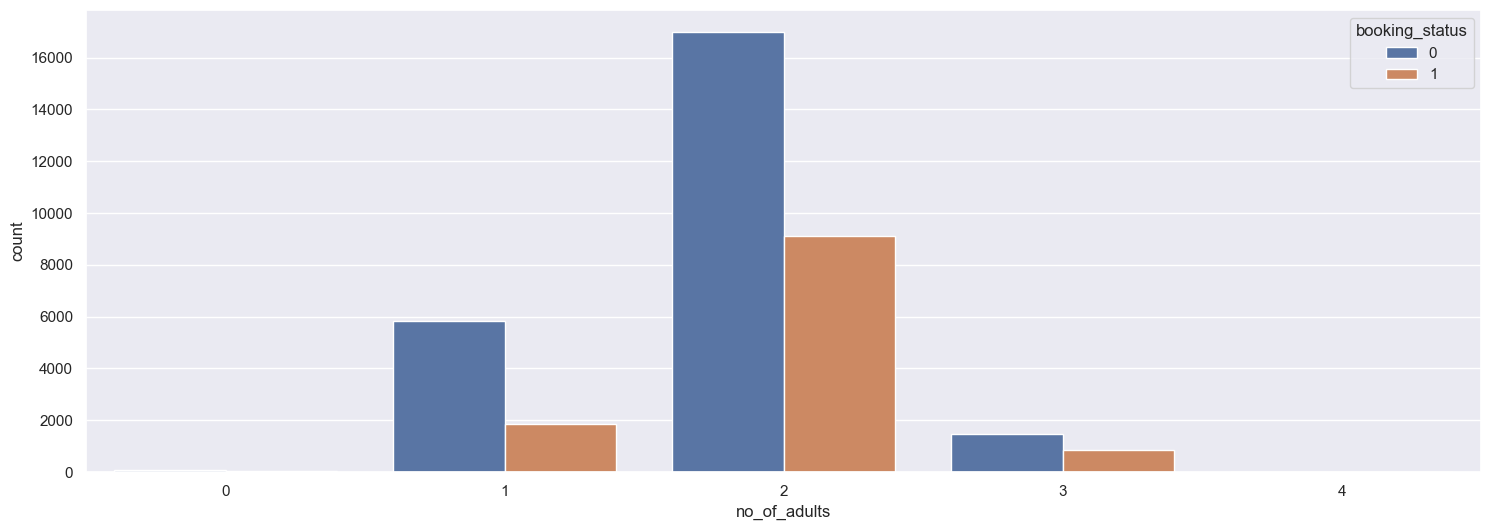

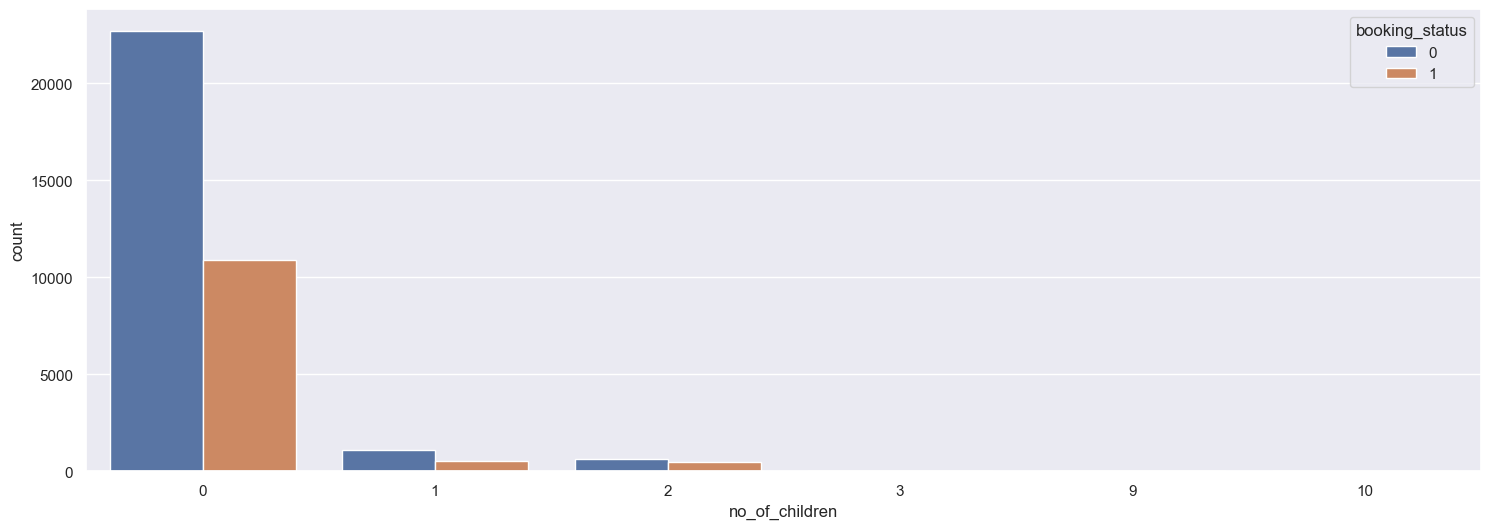

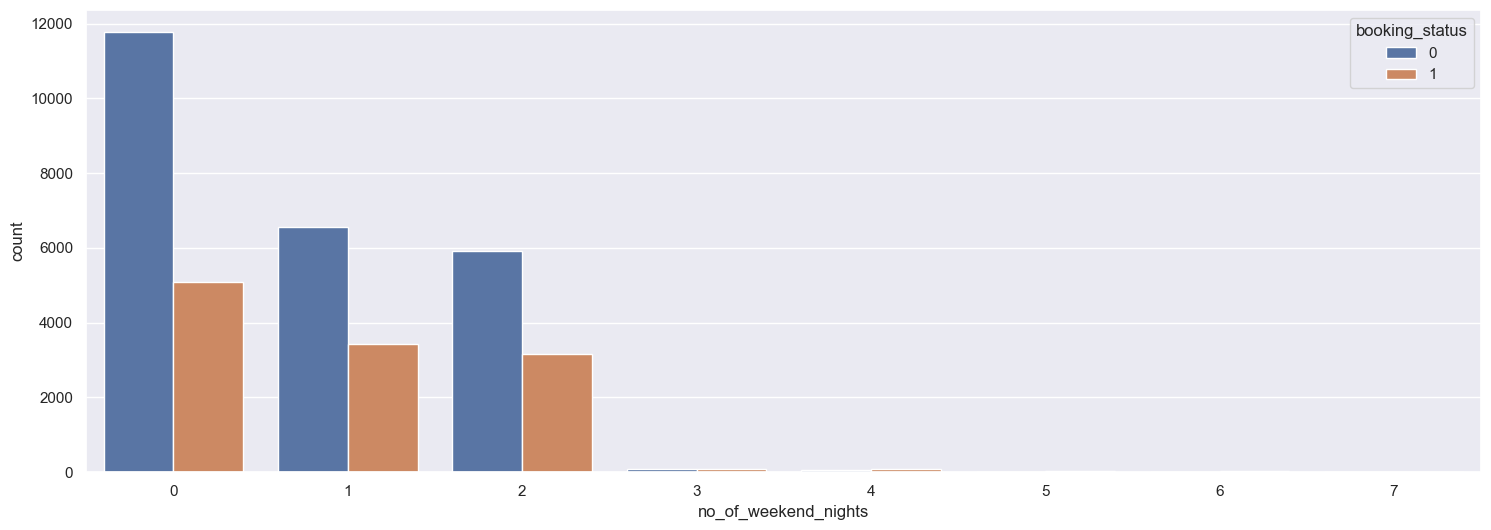

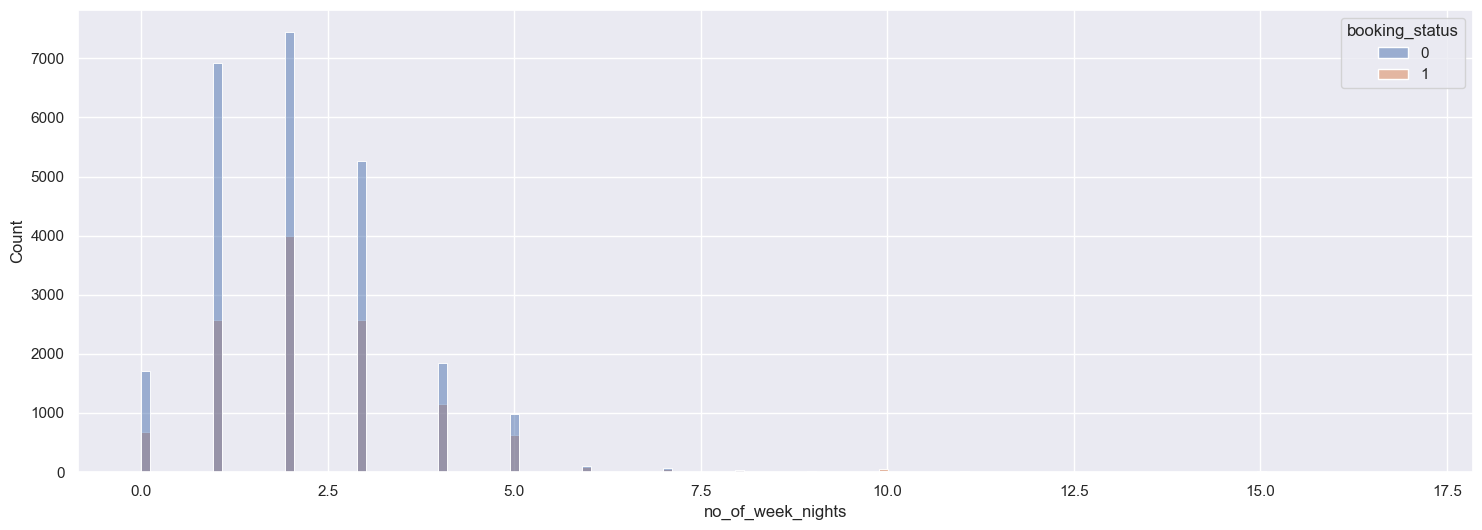

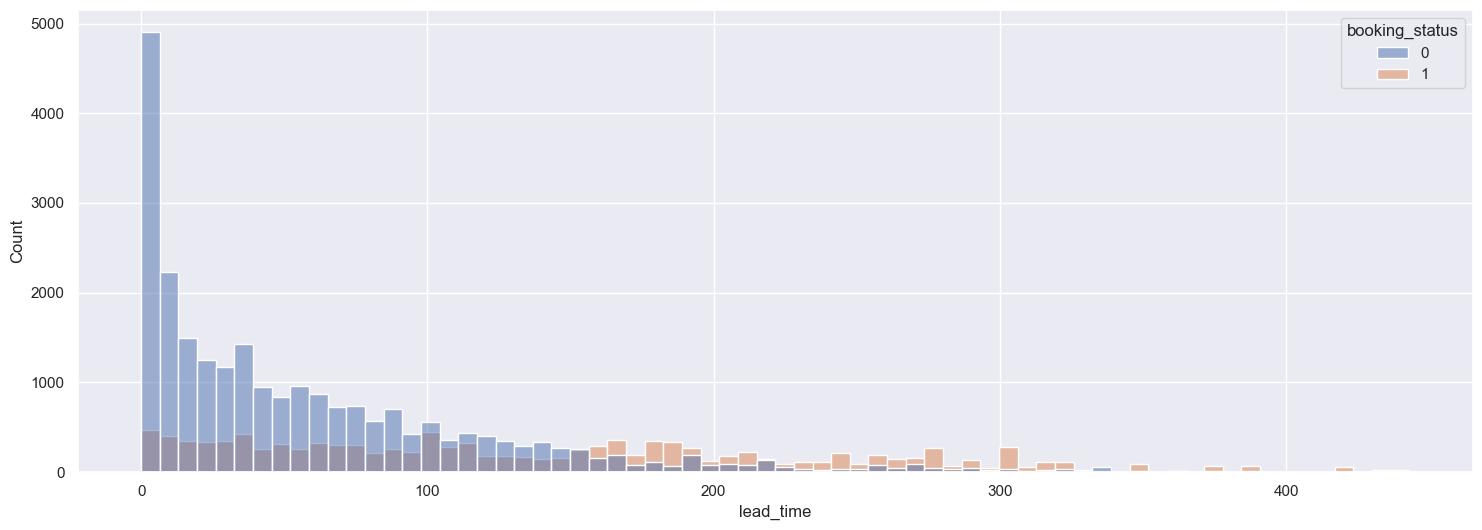

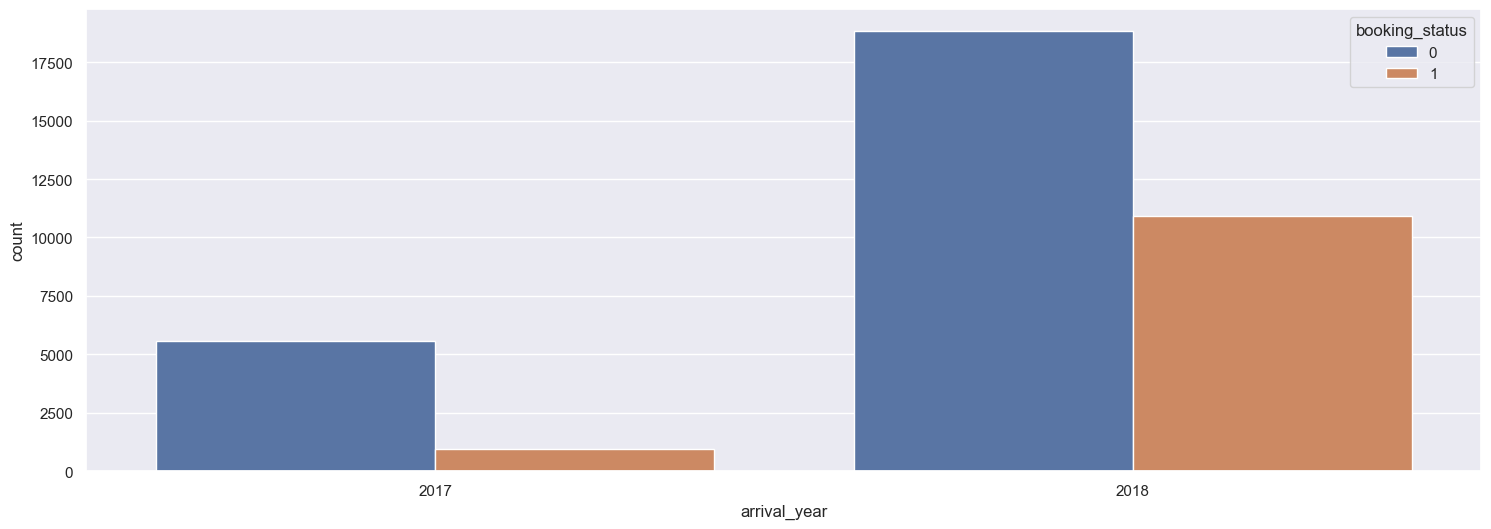

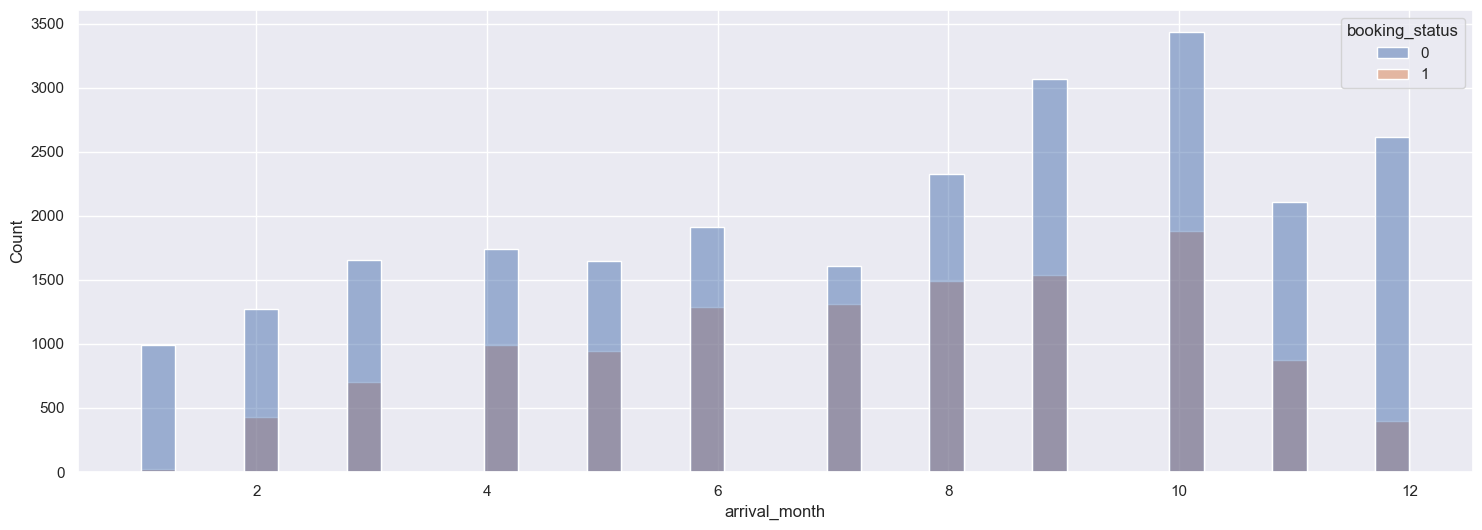

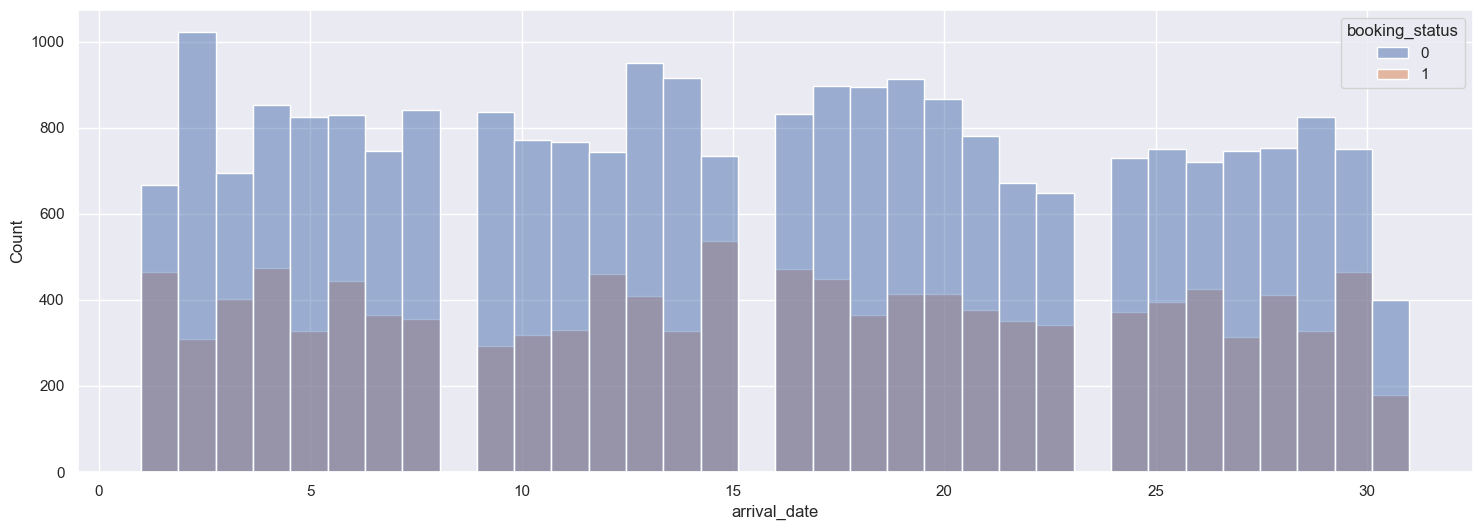

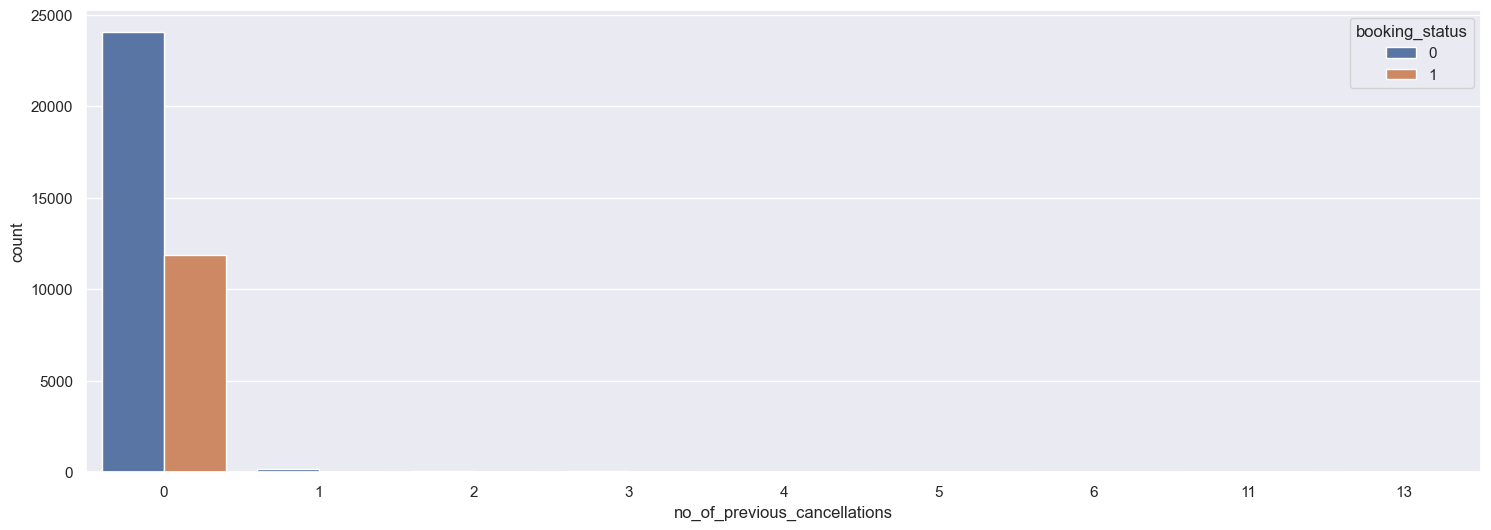

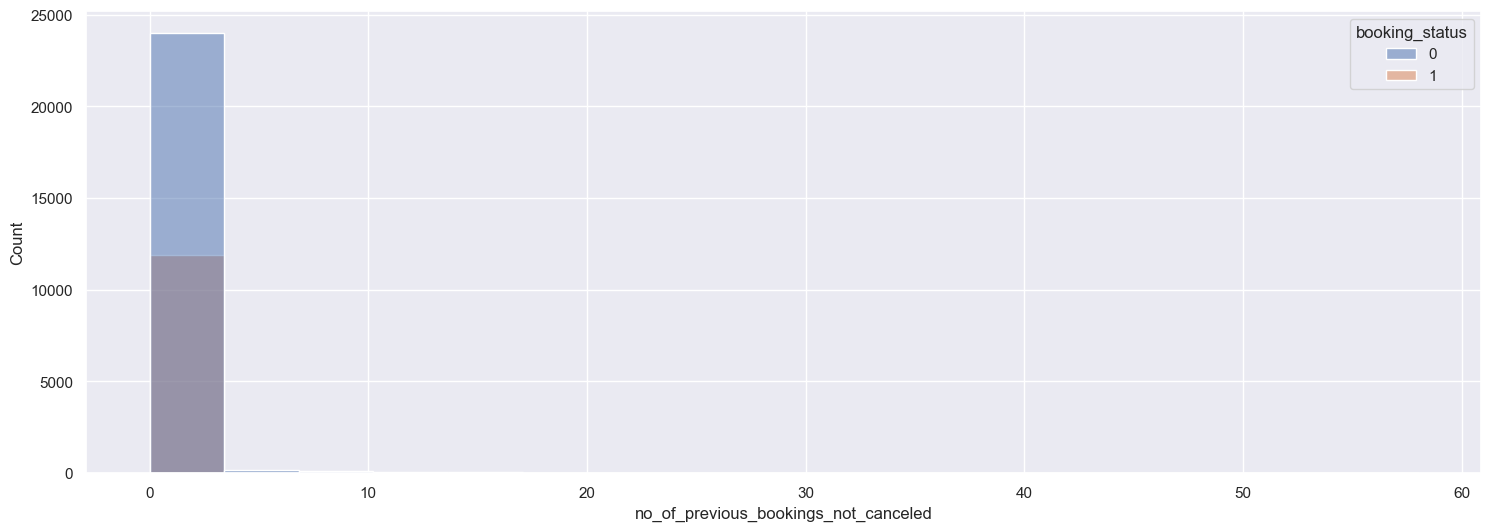

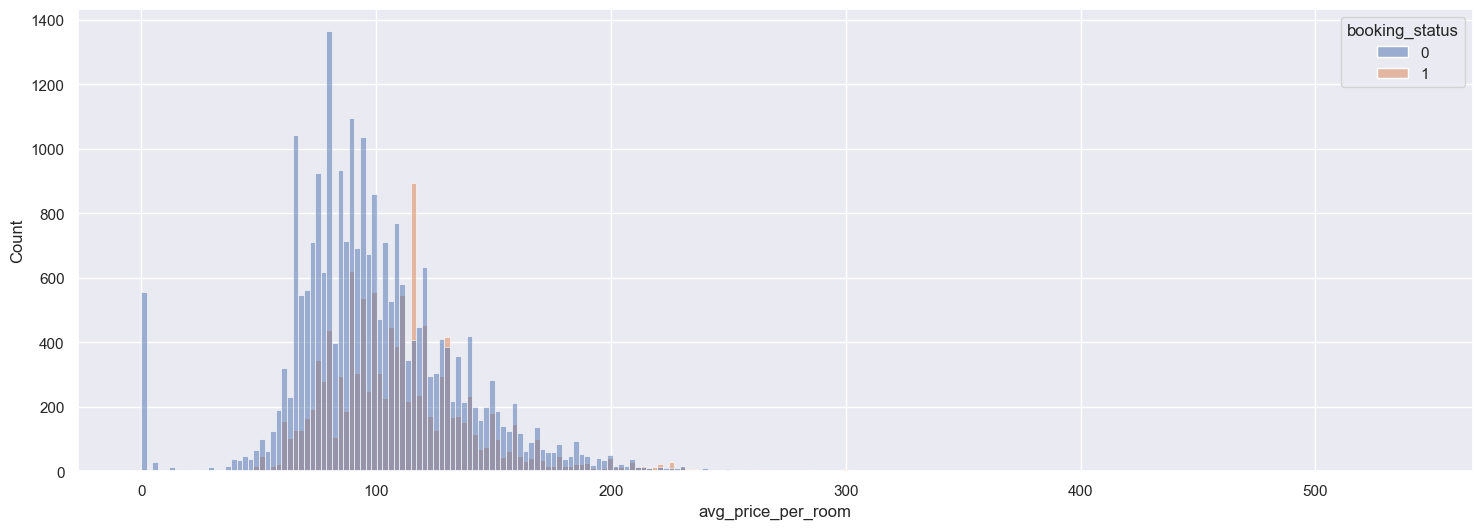

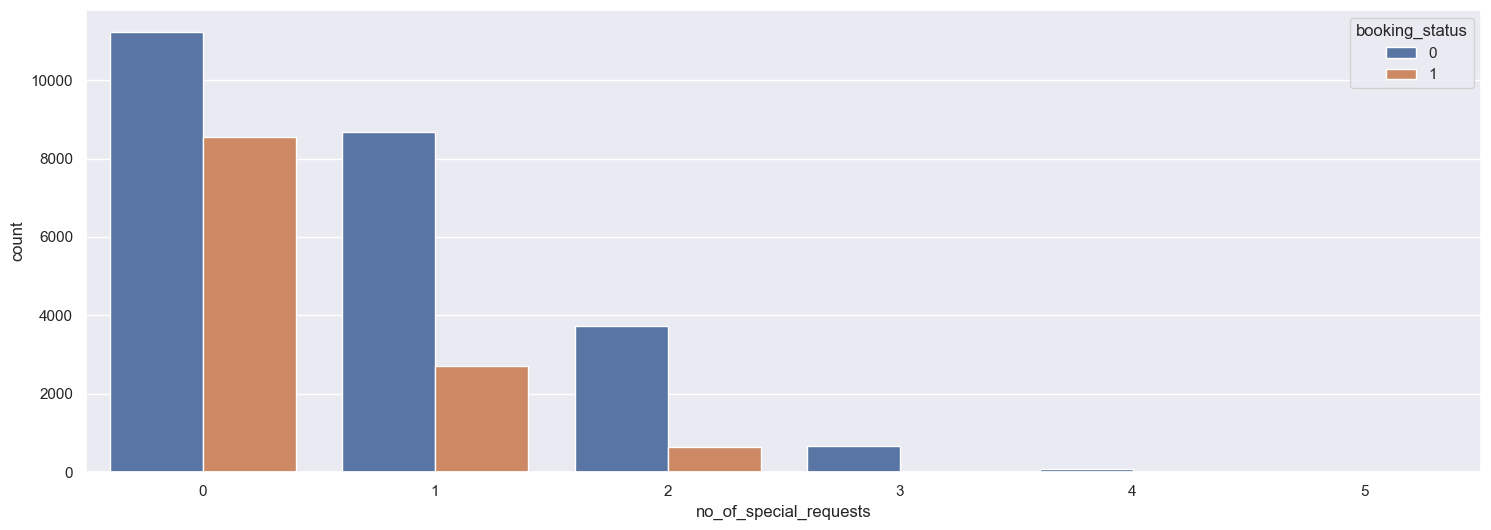

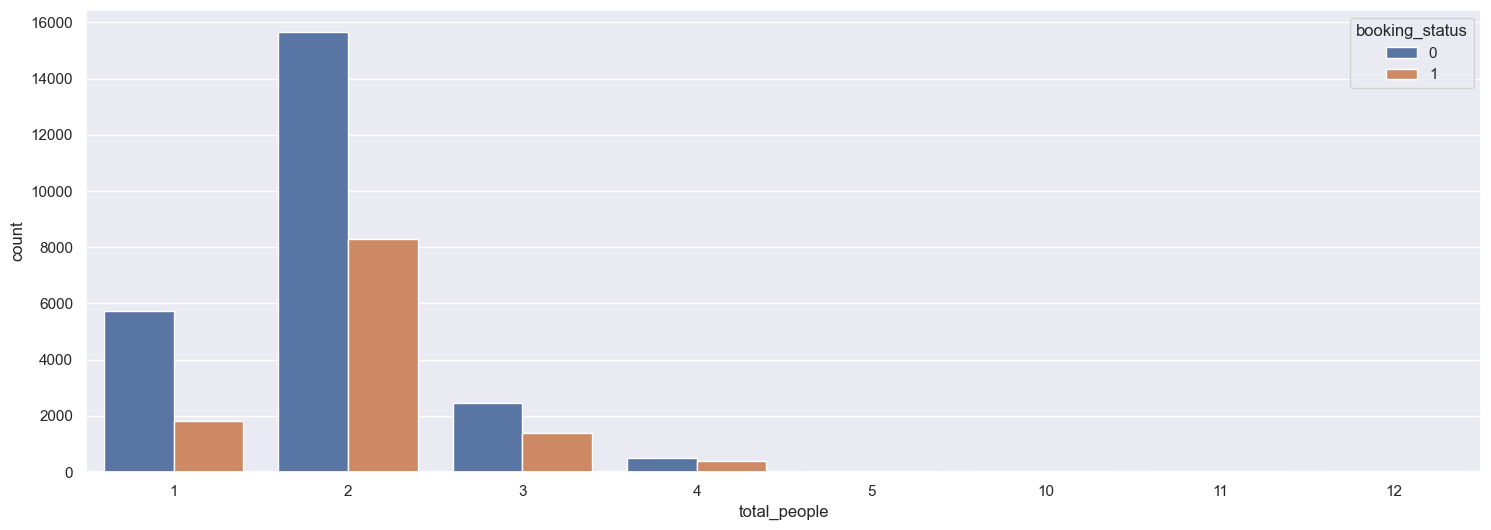

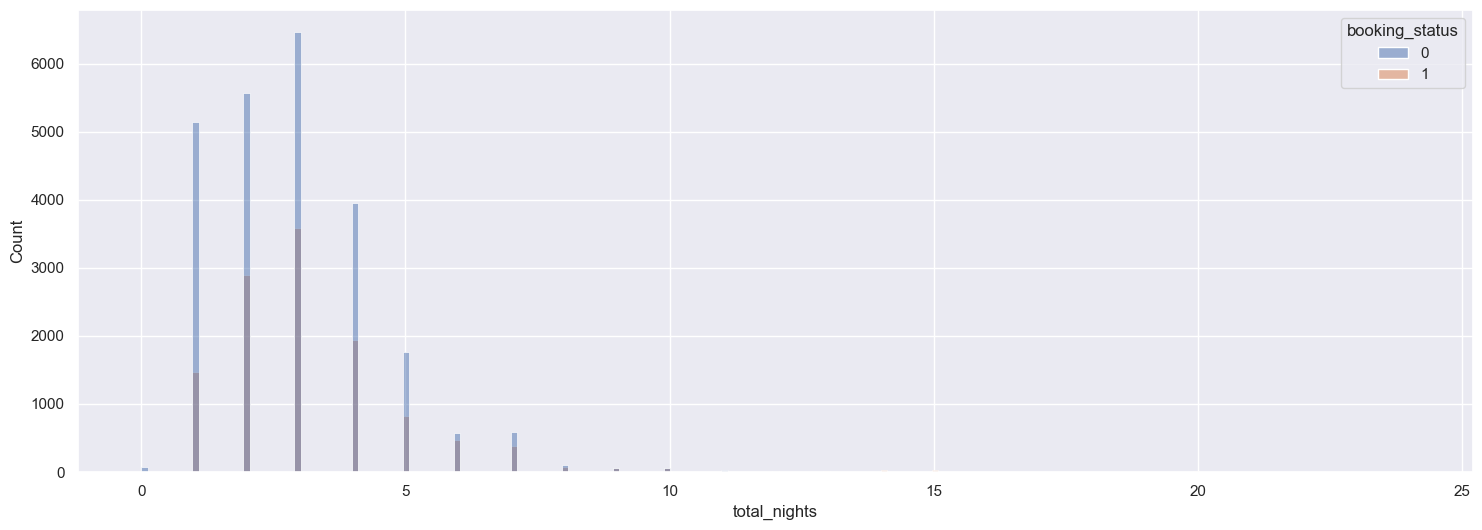

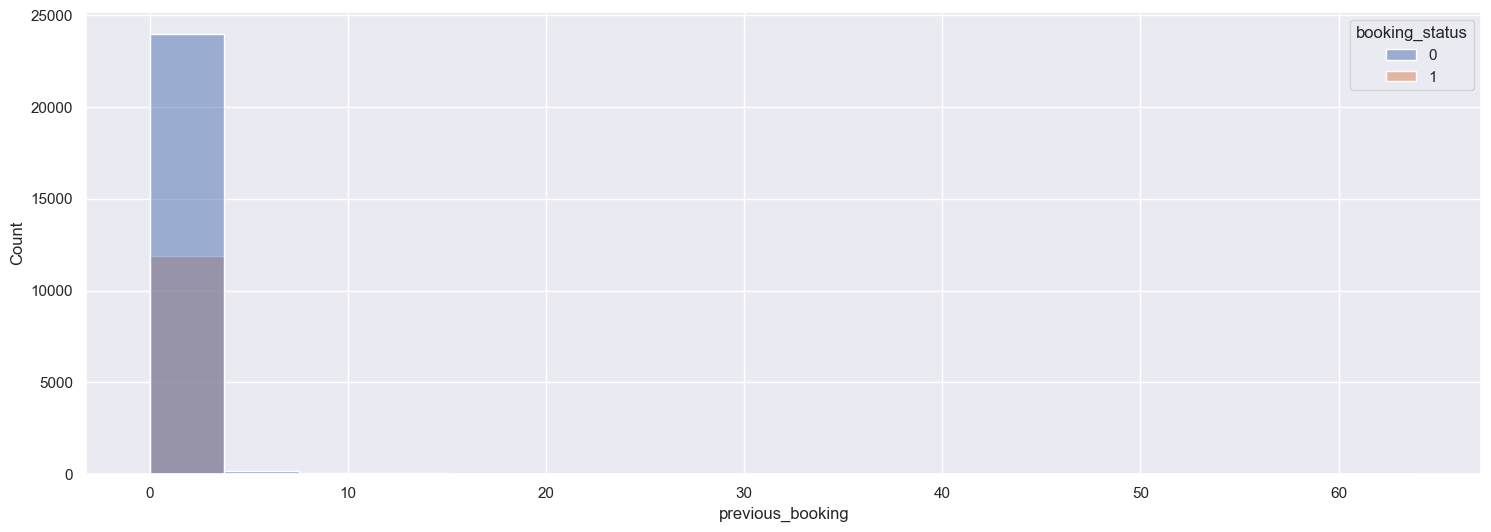

In [95]:
for i in hotel_cuant:
    plt.figure(figsize=(18, 6))
    if hotel_cuant[i].nunique() <= 10:
        sns.countplot(x=i, data=hotel_cuant, hue=hotel["booking_status"])
    else:
        sns.histplot(x=i, data=hotel_cuant, hue=hotel["booking_status"])
    
    sns.set(font_scale=1)
    plt.show()


Tomaremos la variable "Arrival_month" para hacer un análisis específico de la misma.

In [96]:
hotel = hotel.sort_values(["arrival_month"])
hotel_cuant['arrival_month'].unique()

array([10, 11,  2,  5,  4,  9, 12,  7,  6,  8,  3,  1], dtype=int64)

In [97]:
map_month = {10: "Octubre", 11: "Noviembre",  2: "Febrero",  5: "Mayo",  4: "Abril",  9: "Septiembre", 12: "Diciembre",  7: "Julio",  6: "Junio",  8: "Agosto",  3: "Marzo",  1: "Enero"}
hotel["arrival_month"] = hotel["arrival_month"].replace(map_month)
hotel["arrival_month"].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype=object)

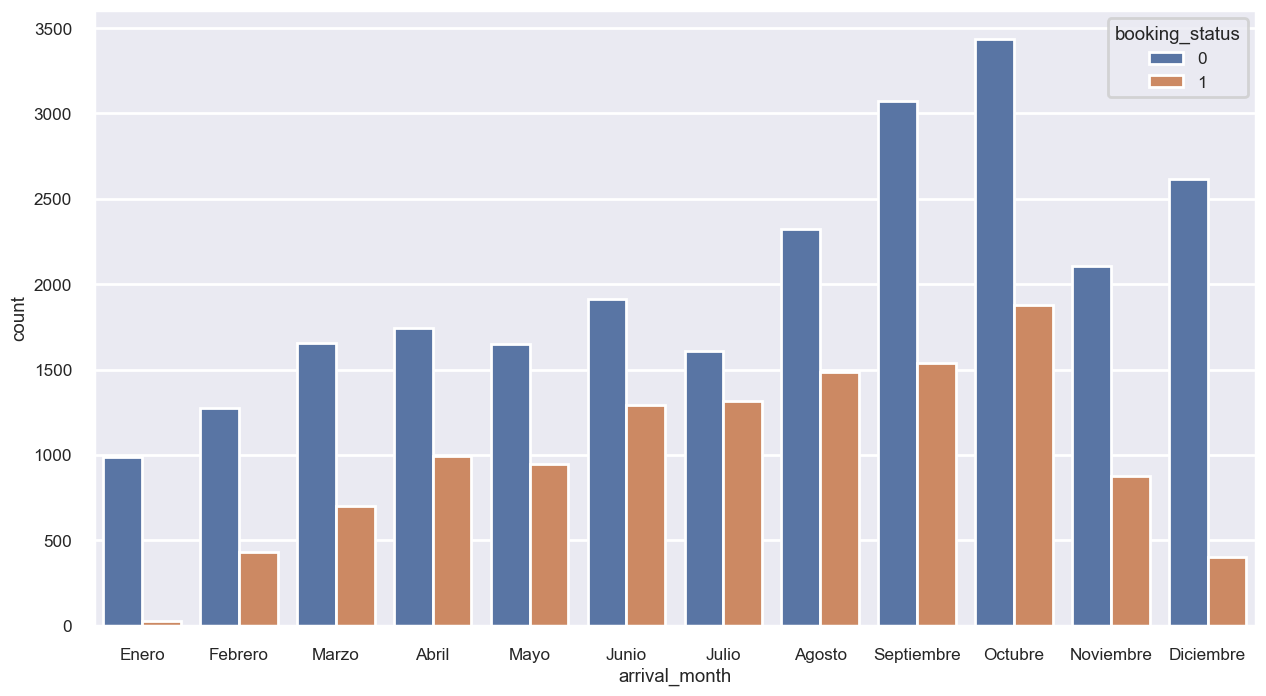

In [98]:
plt.figure(figsize=(15,8))
sns.set_context("poster",font_scale = .56)
sns.countplot(x = hotel['arrival_month'],data = hotel , hue='booking_status')
plt.show()

* A partir del mes de Agosto y hasta el mes de Diciembre las reservas crecen significativamente, coincidentemente con las vacaciones de invierno.
* Durante los meses de Diciembre, Enero y Febrero las reservas canceladas son minimas.

#### Variables Cualitativas

In [99]:
hotel_cuali = hotel.select_dtypes(include= object)
hotel_cuali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 10987 to 36274
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   type_of_meal_plan           36275 non-null  object
 1   required_car_parking_space  36275 non-null  object
 2   room_type_reserved          36275 non-null  object
 3   arrival_month               36275 non-null  object
 4   repeated_guest              36275 non-null  object
 5   booking_status              36275 non-null  object
 6   market_Aviation             36275 non-null  object
 7   market_Complementary        36275 non-null  object
 8   market_Corporate            36275 non-null  object
 9   market_Offline              36275 non-null  object
 10  market_Online               36275 non-null  object
dtypes: object(11)
memory usage: 3.3+ MB


In [100]:
for col in hotel_cuali.columns:
    print(hotel_cuali[col].unique())
    print(hotel_cuali[col].nunique())

[1 0 2 3]
4
[0 1]
2
[1 6 4 2 7 5 3]
7
['Enero' 'Febrero' 'Marzo' 'Abril' 'Mayo' 'Junio' 'Julio' 'Agosto'
 'Septiembre' 'Octubre' 'Noviembre' 'Diciembre']
12
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2


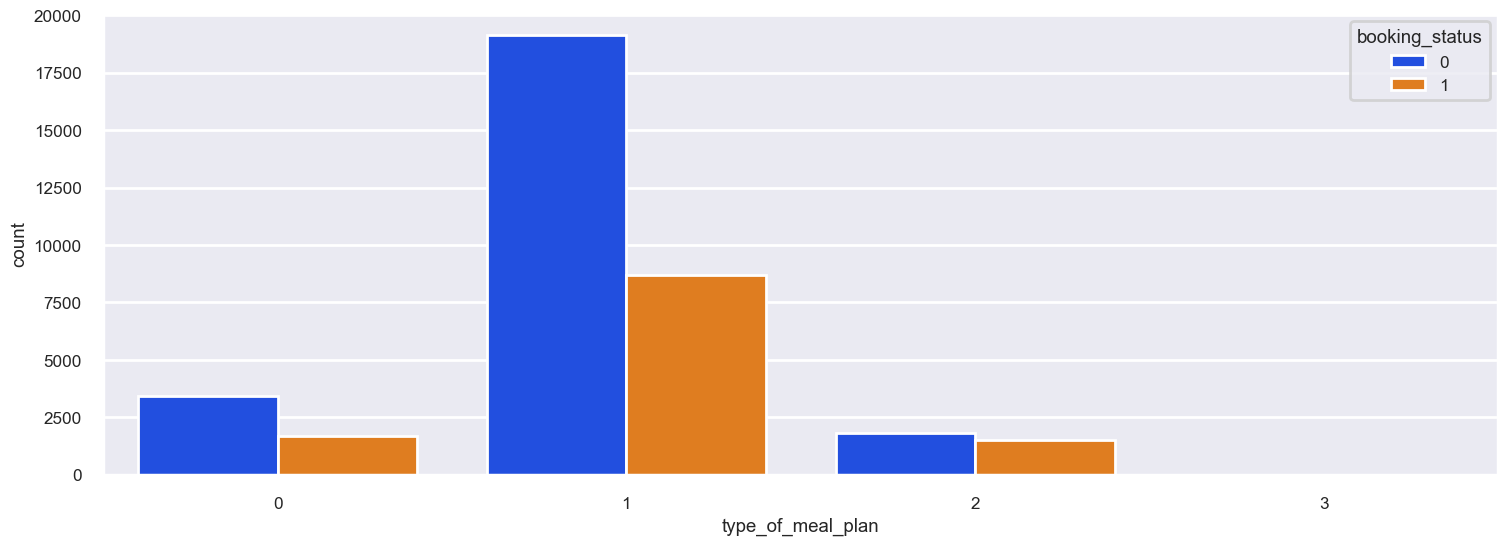

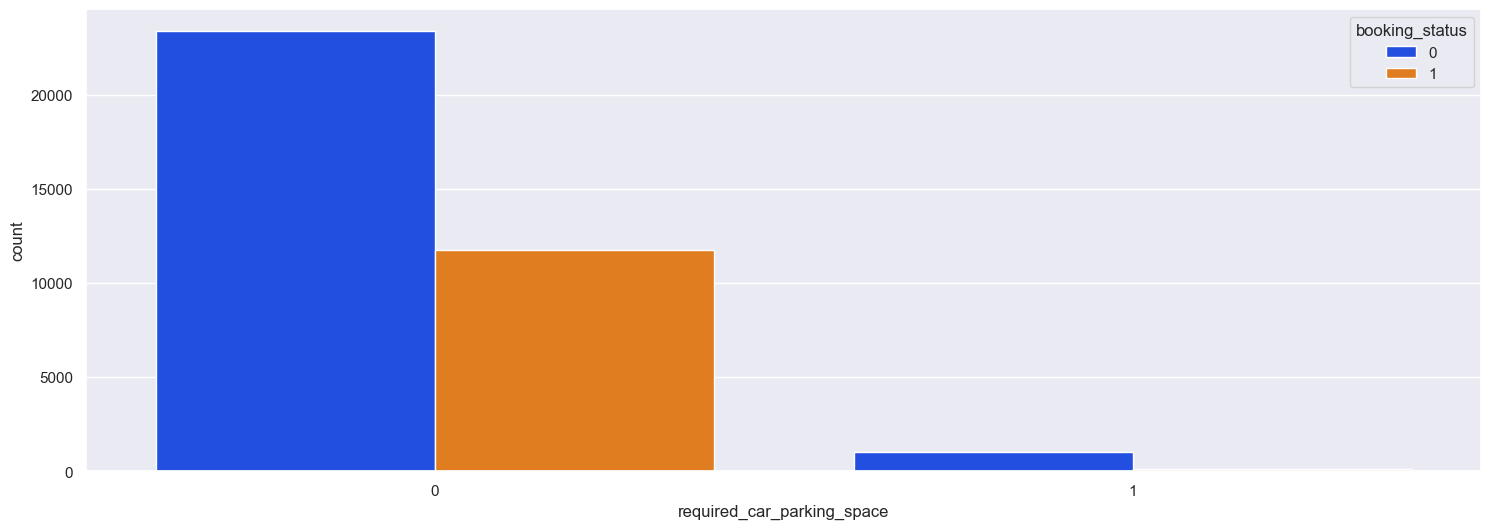

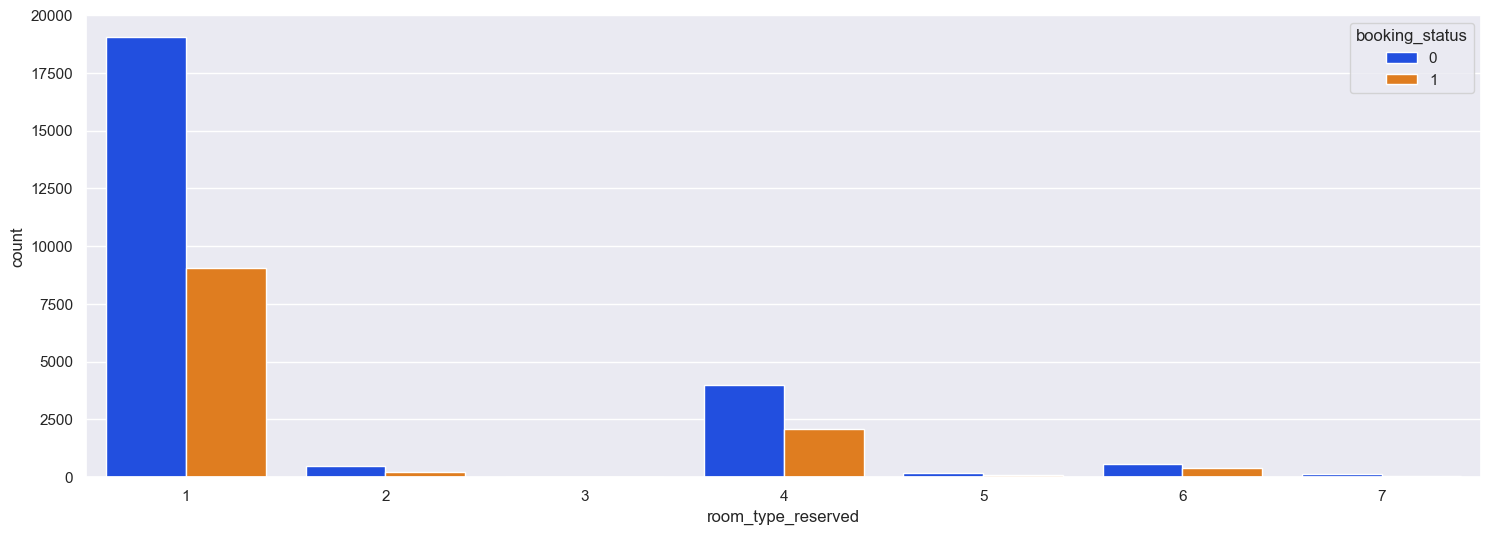

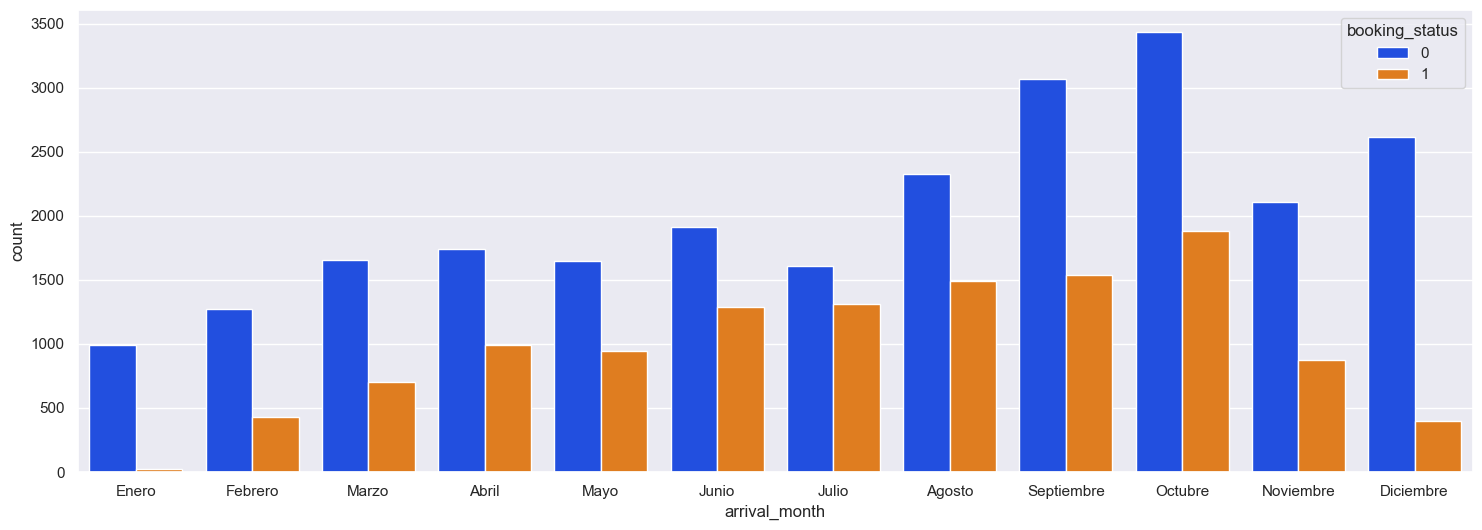

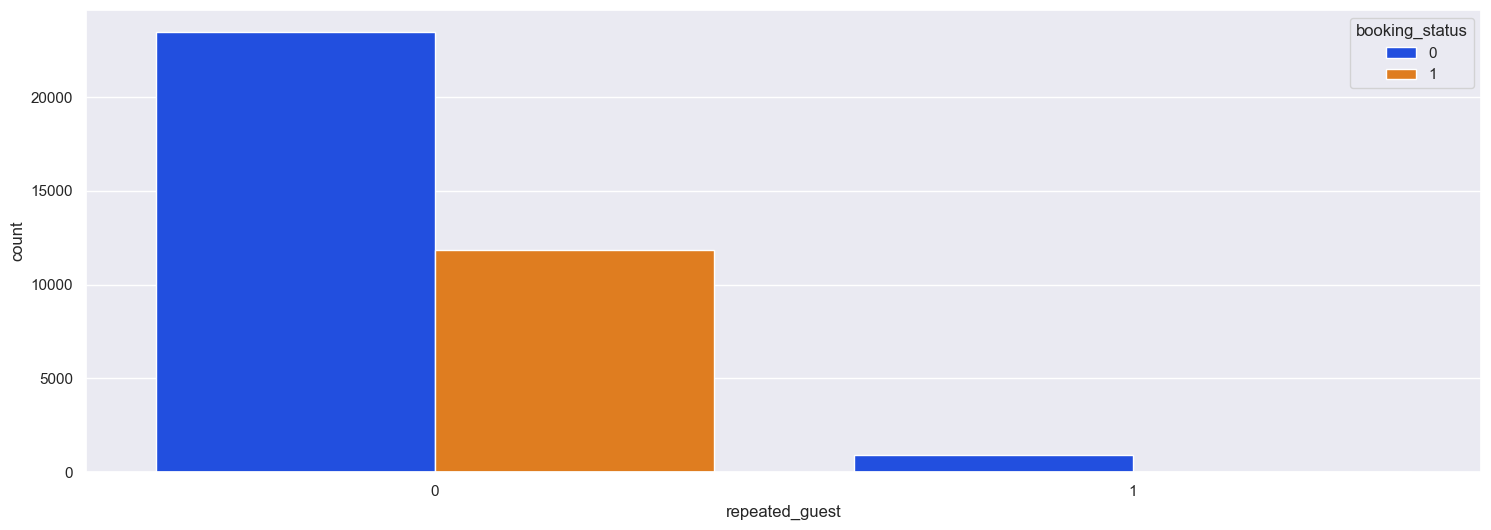

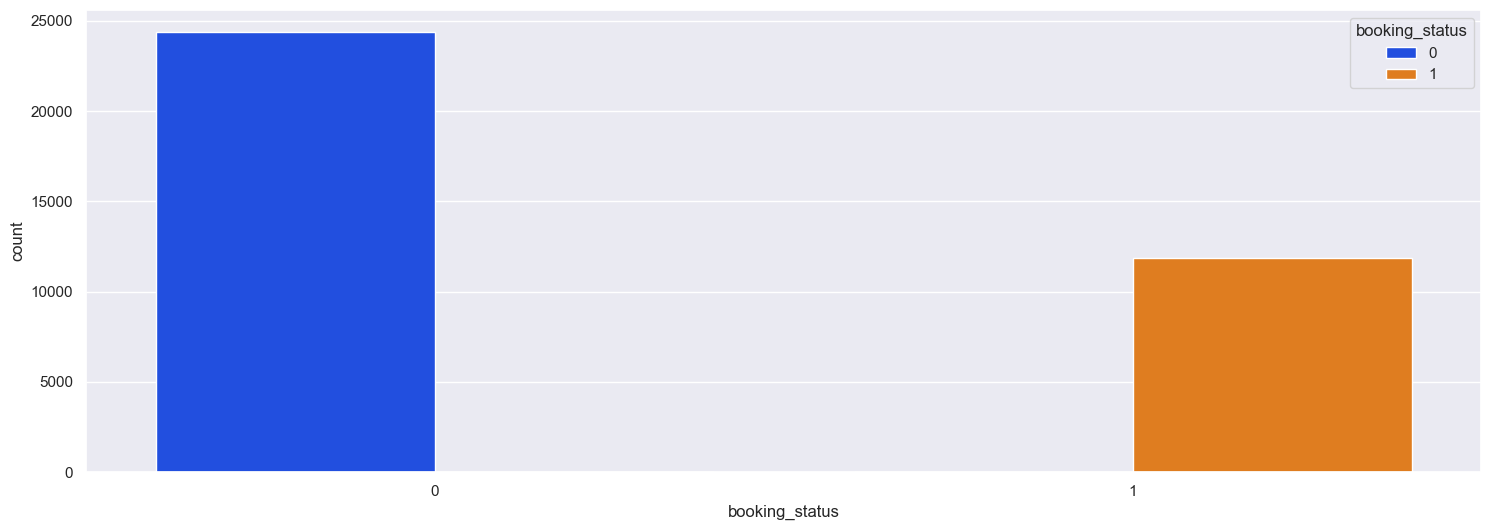

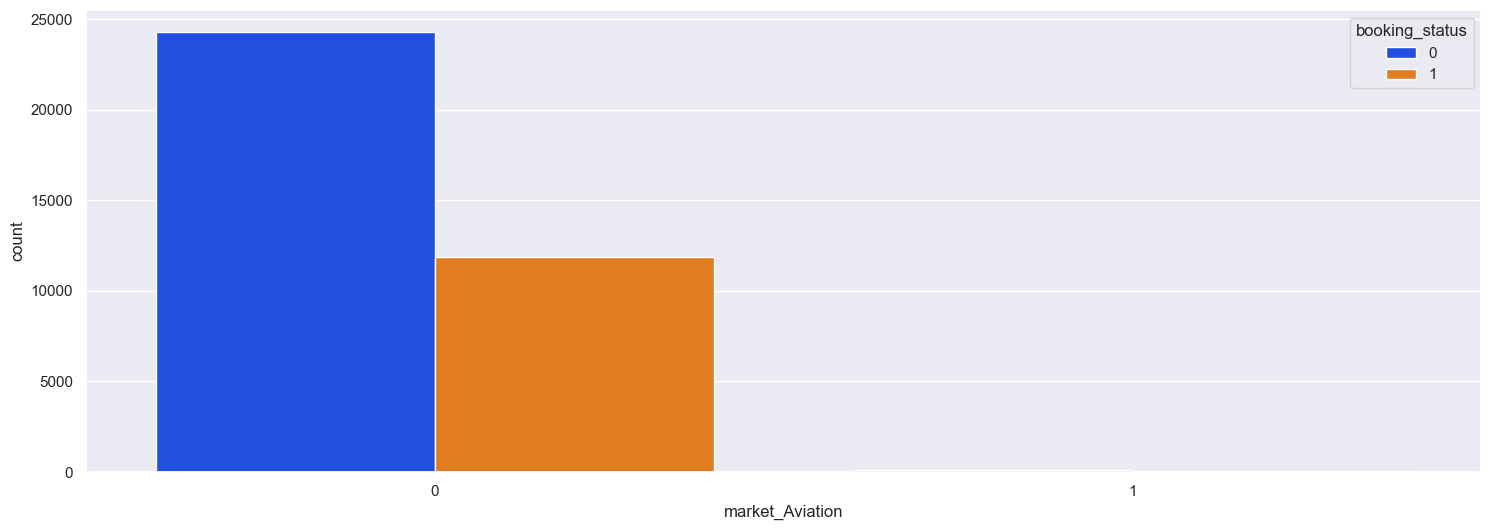

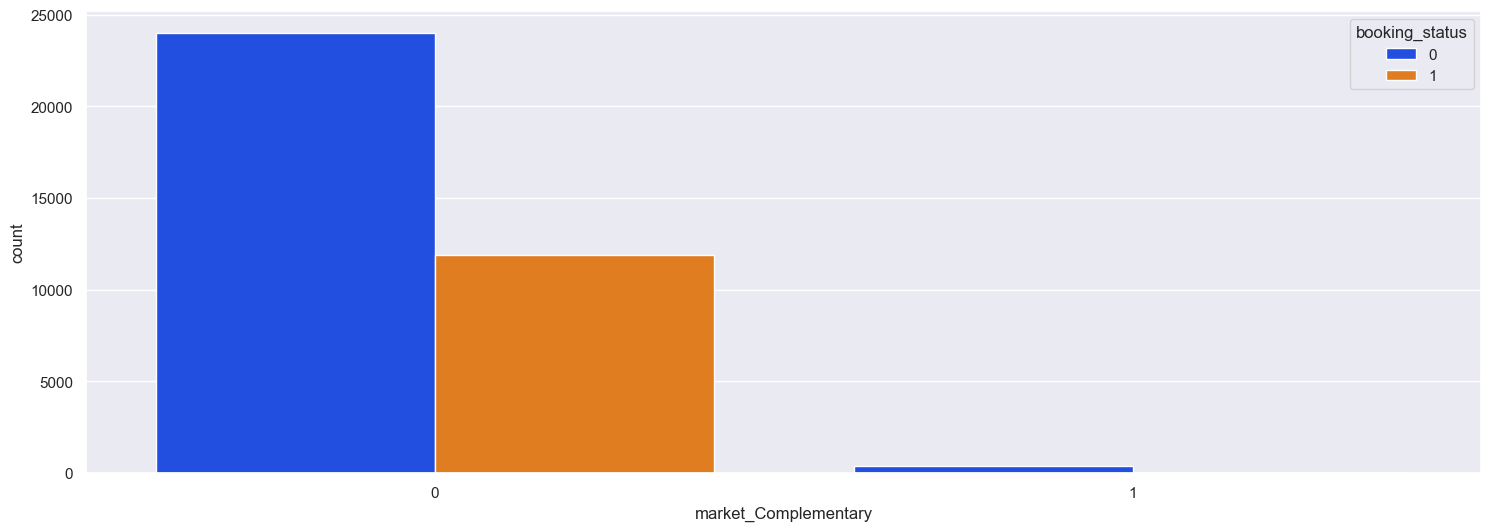

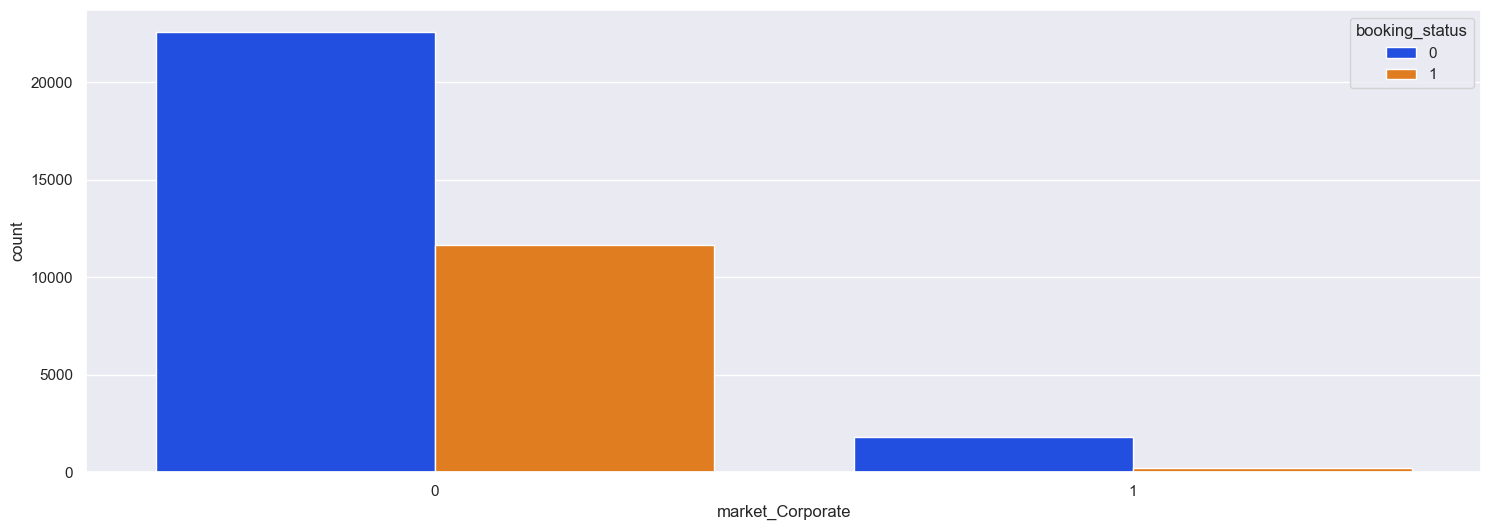

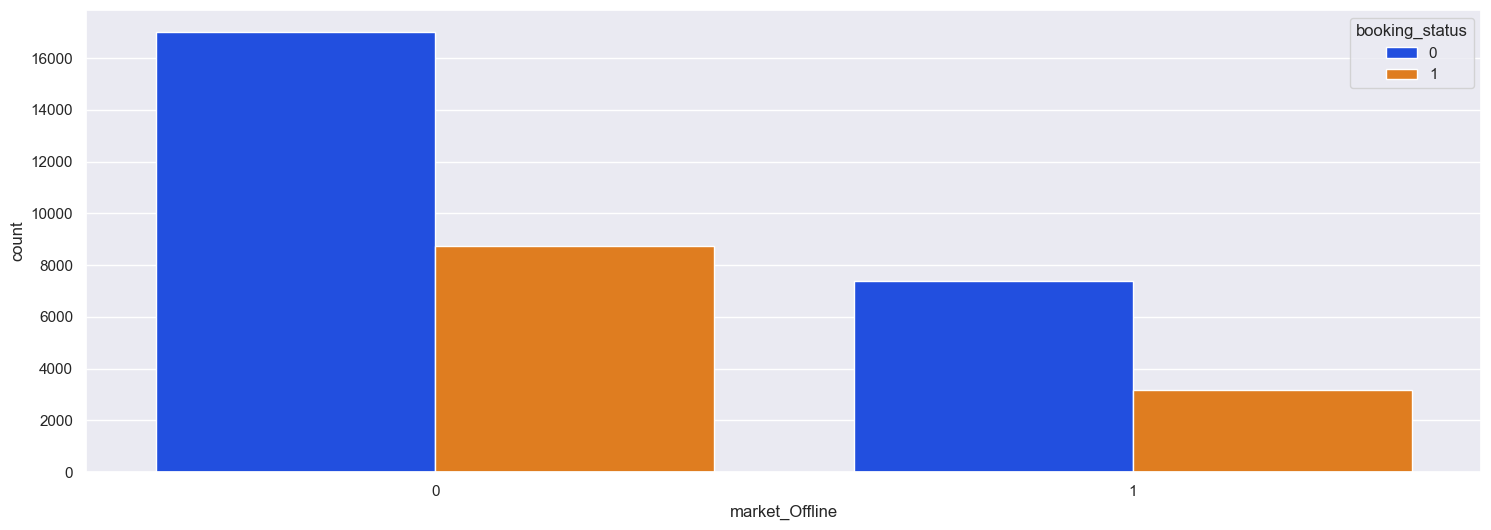

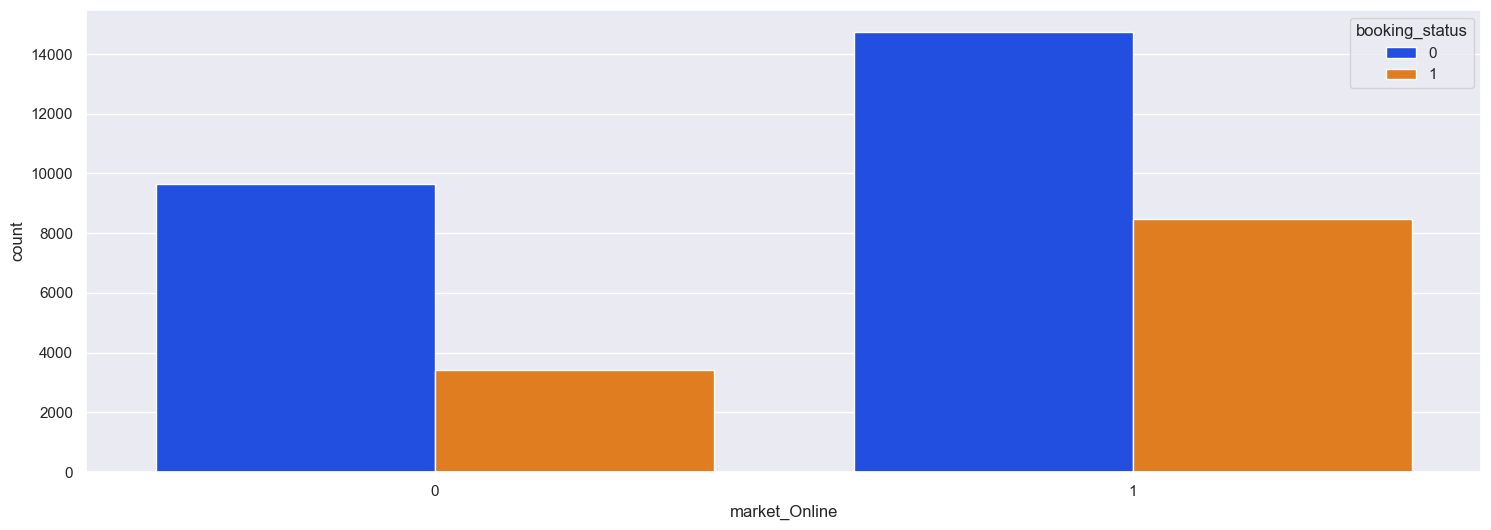

In [101]:
for i in hotel_cuali:
    plt.figure(figsize=(18, 6))
    sns.countplot(x =i, data = hotel_cuali, palette = 'bright', hue = hotel["booking_status"])
    sns.set(font_scale = 1)
    plt.show()  


In [102]:
ht_meal = pd.crosstab(hotel_cuali.booking_status, hotel_cuali.type_of_meal_plan, normalize='columns')
ht_meal

type_of_meal_plan,0,1,2,3
booking_status,,,,
0,0.668811,0.688198,0.544327,0.8
1,0.331189,0.311802,0.455673,0.2


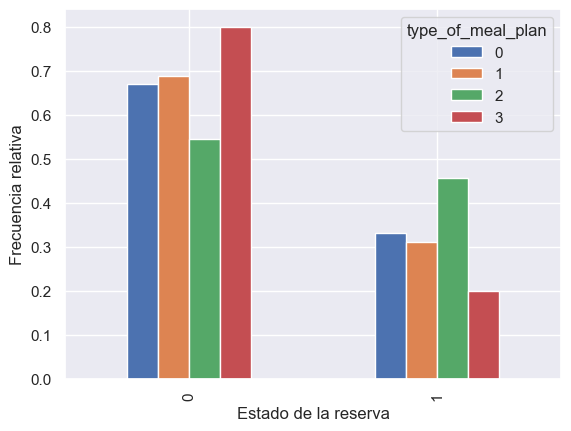

In [103]:
ht_meal.plot(kind='bar') 
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [104]:
ht_room = pd.crosstab(hotel_cuali.booking_status, hotel_cuali.room_type_reserved, normalize='columns')
ht_room

room_type_reserved,1,2,3,4,5,6,7
booking_status,,,,,,,
0,0.677497,0.67052,0.714286,0.658412,0.728302,0.57971,0.772152
1,0.322503,0.32948,0.285714,0.341588,0.271698,0.42029,0.227848


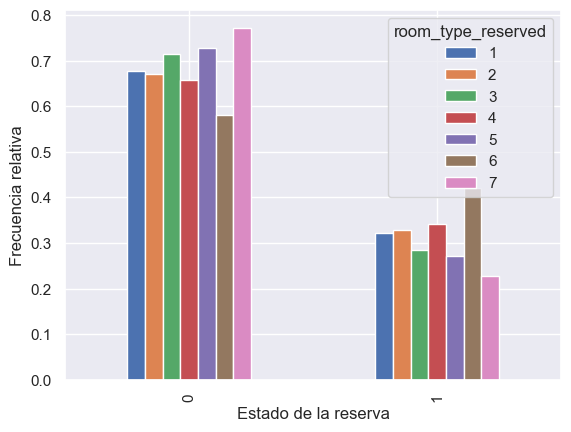

In [105]:
ht_room.plot(kind='bar') 
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [106]:
htcancel = hotel["booking_status"]
htcancel

10987    0
14608    0
28442    0
6754     0
23530    0
        ..
22512    0
22503    0
22492    0
22614    0
36274    0
Name: booking_status, Length: 36275, dtype: object

In [107]:
hotel_cuant["iscancel"] = htcancel
hotel_cuant.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   lead_time                             36275 non-null  int64  
 5   arrival_year                          36275 non-null  int64  
 6   arrival_month                         36275 non-null  int64  
 7   arrival_date                          36275 non-null  int64  
 8   no_of_previous_cancellations          36275 non-null  int64  
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 10  avg_price_per_room                    36275 non-null  float64
 11  no_of_special_r

In [108]:
#sns.pairplot(hotel_cuant, hue='iscancel')

#### Conclusiones

- Las personas que realizaron reservas previas en el mismo hotel no registran cancelaciones.
- Se observan 2 nubes bien diferenciadas para el precio promedio de habitación (avg_price_per_room) y para el tiempo de espera (lead_time).
- Aproximadamente el 50% de las reservas que comprenden el plan 2 de comidas (type_of_meal_plan) son canceladas.
- Las reservas realizadas se mantienen para 9 de cada 10 en la categoria "Corporate" (market_segment_type)
- Se observa que la variable target sería "booking_status" para ver la cancelación de las reservas.


### Exploratory Data Analysis

#### Análisis Univariado

##### Variables Cuantitativas

In [109]:
hotel_cuant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   lead_time                             36275 non-null  int64  
 5   arrival_year                          36275 non-null  int64  
 6   arrival_month                         36275 non-null  int64  
 7   arrival_date                          36275 non-null  int64  
 8   no_of_previous_cancellations          36275 non-null  int64  
 9   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 10  avg_price_per_room                    36275 non-null  float64
 11  no_of_special_r

In [110]:
hotel_cuant = hotel_cuant.drop(['iscancel','arrival_year','arrival_month','arrival_date'], axis=1)

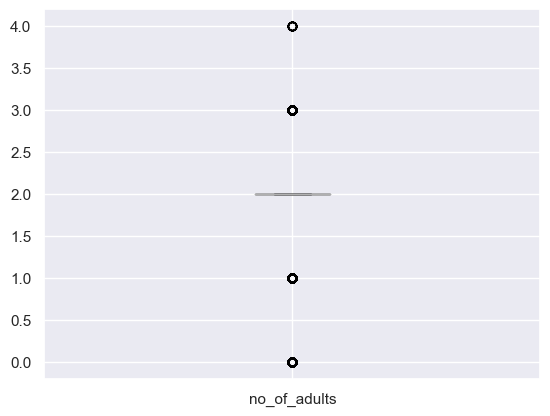

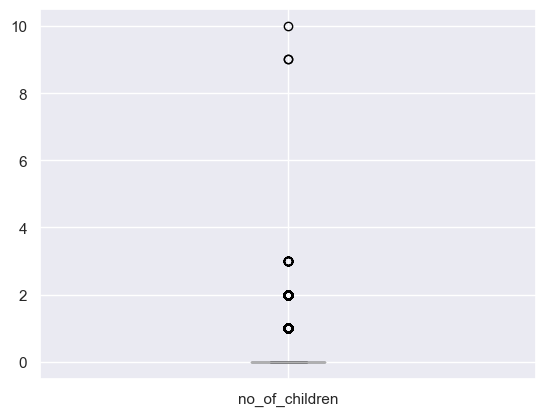

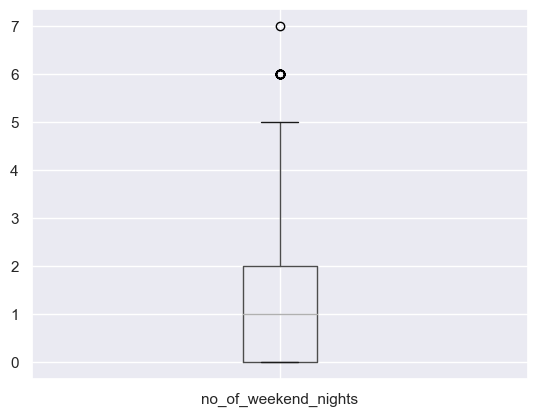

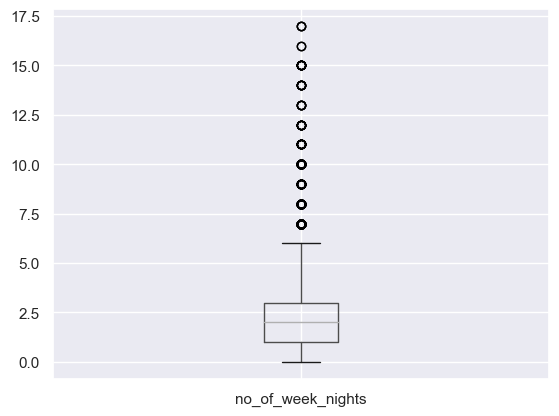

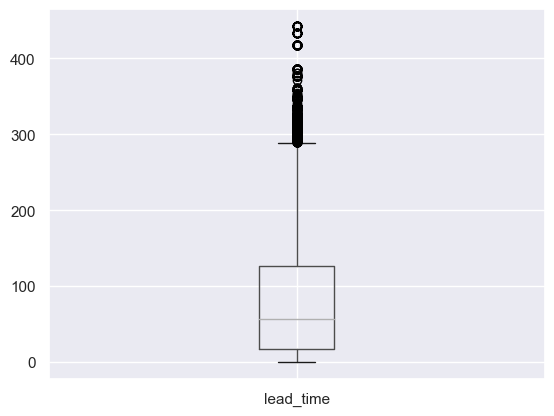

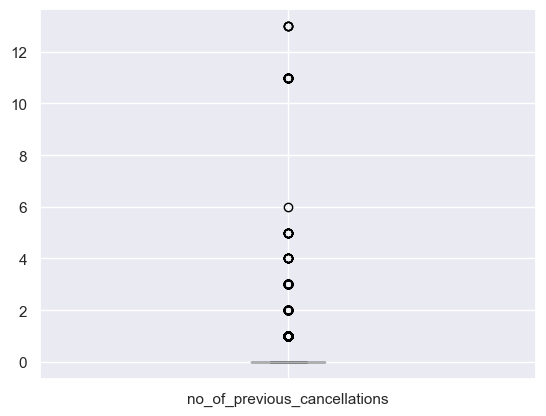

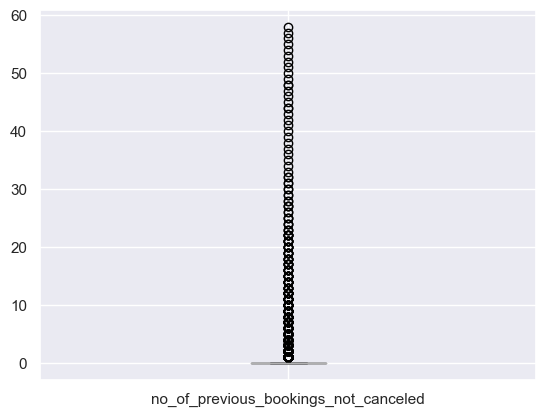

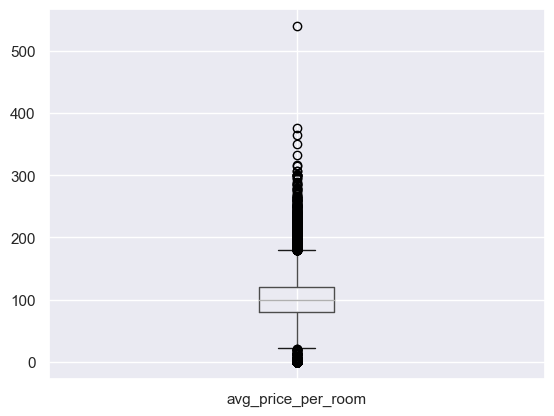

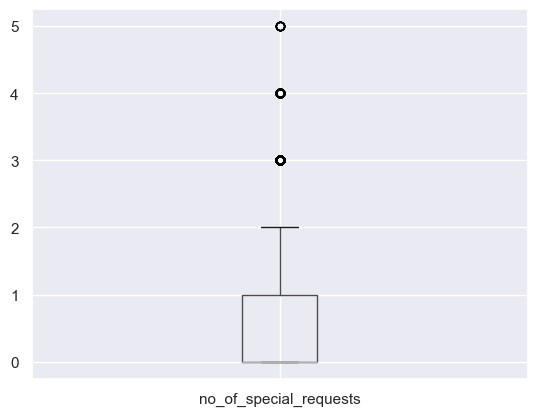

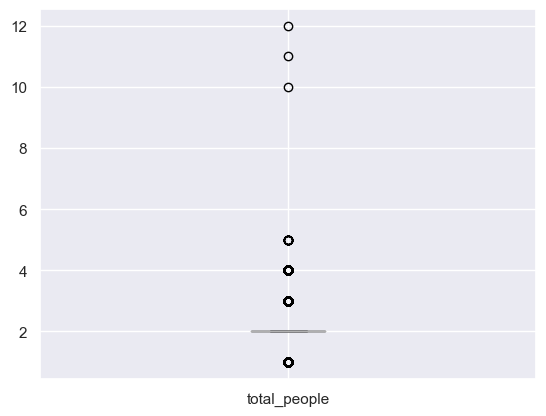

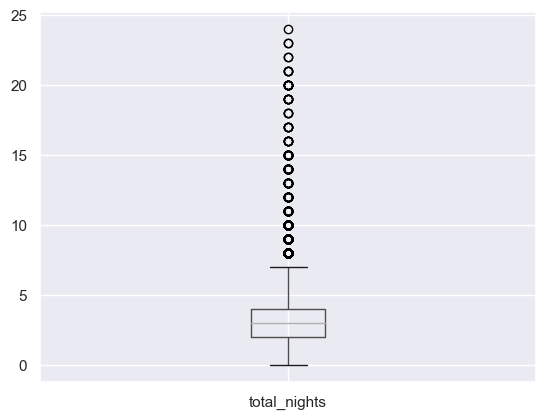

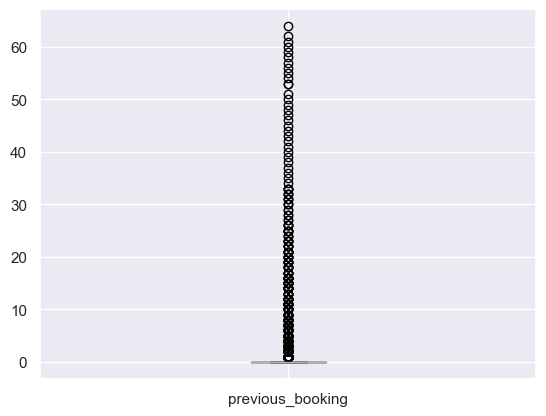

In [111]:
for i in hotel_cuant:
    hotel_cuant.boxplot(column = i)
    plt.show()

Gran parte de los gráficos muestran las cajas colapsadas, observandose de esta manera muchos outliers los cuales no nos permiten obtener información relevante. De igual manera analizaremos algunas de estas variables en detalle mas abajo.

##### Variables Cualitativas

In [112]:
hotel_cuali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 10987 to 36274
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   type_of_meal_plan           36275 non-null  object
 1   required_car_parking_space  36275 non-null  object
 2   room_type_reserved          36275 non-null  object
 3   arrival_month               36275 non-null  object
 4   repeated_guest              36275 non-null  object
 5   booking_status              36275 non-null  object
 6   market_Aviation             36275 non-null  object
 7   market_Complementary        36275 non-null  object
 8   market_Corporate            36275 non-null  object
 9   market_Offline              36275 non-null  object
 10  market_Online               36275 non-null  object
dtypes: object(11)
memory usage: 4.3+ MB


In [113]:
hotel_cuali = hotel_cuali.drop(['arrival_month'], axis = 1)
hotel_cuali.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 10987 to 36274
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   type_of_meal_plan           36275 non-null  object
 1   required_car_parking_space  36275 non-null  object
 2   room_type_reserved          36275 non-null  object
 3   repeated_guest              36275 non-null  object
 4   booking_status              36275 non-null  object
 5   market_Aviation             36275 non-null  object
 6   market_Complementary        36275 non-null  object
 7   market_Corporate            36275 non-null  object
 8   market_Offline              36275 non-null  object
 9   market_Online               36275 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB


In [114]:
for col in hotel_cuali.columns:
    print(hotel_cuali[col].unique())
    print(hotel_cuali[col].nunique())  

[1 0 2 3]
4
[0 1]
2
[1 6 4 2 7 5 3]
7
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[0 1]
2
[1 0]
2


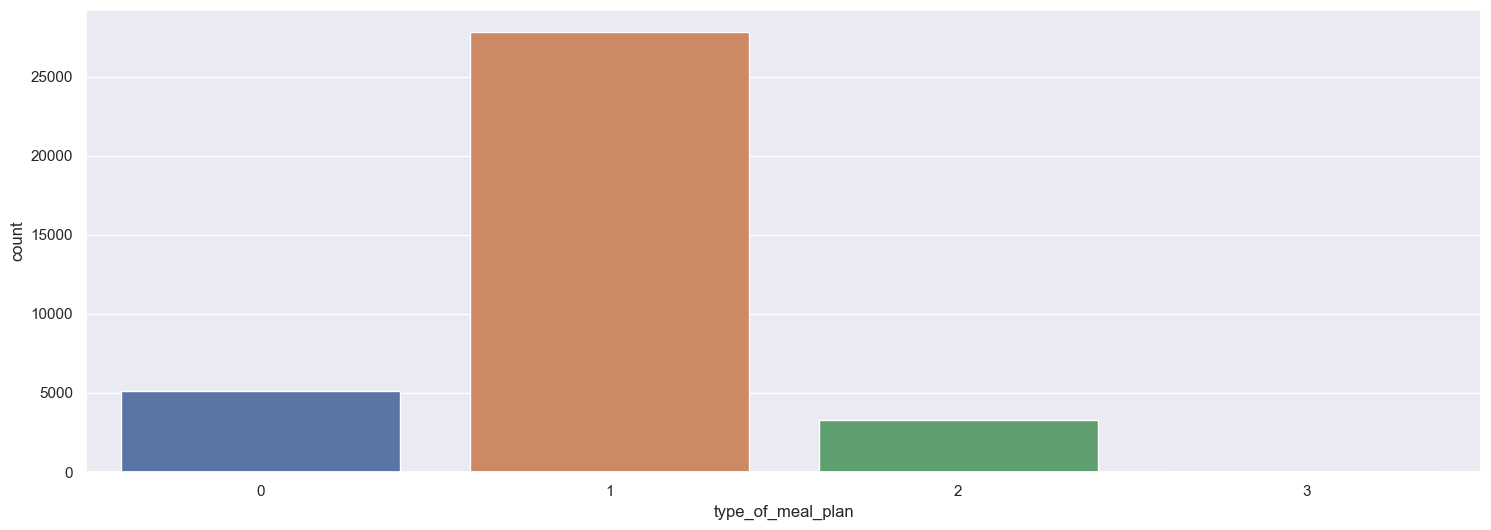

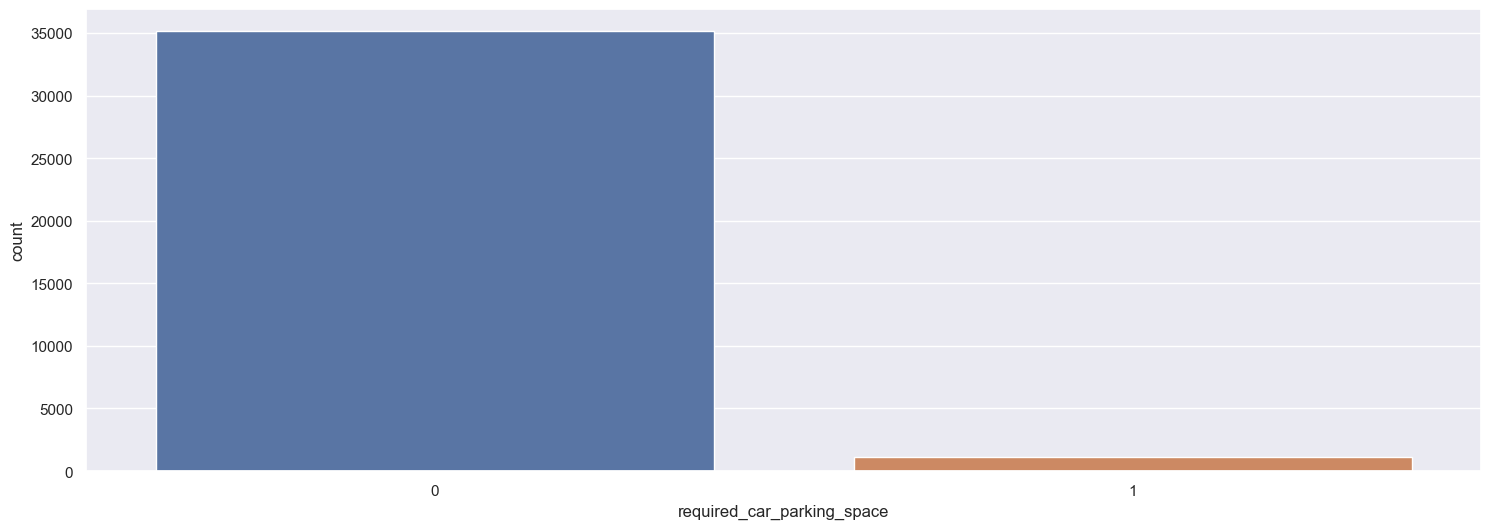

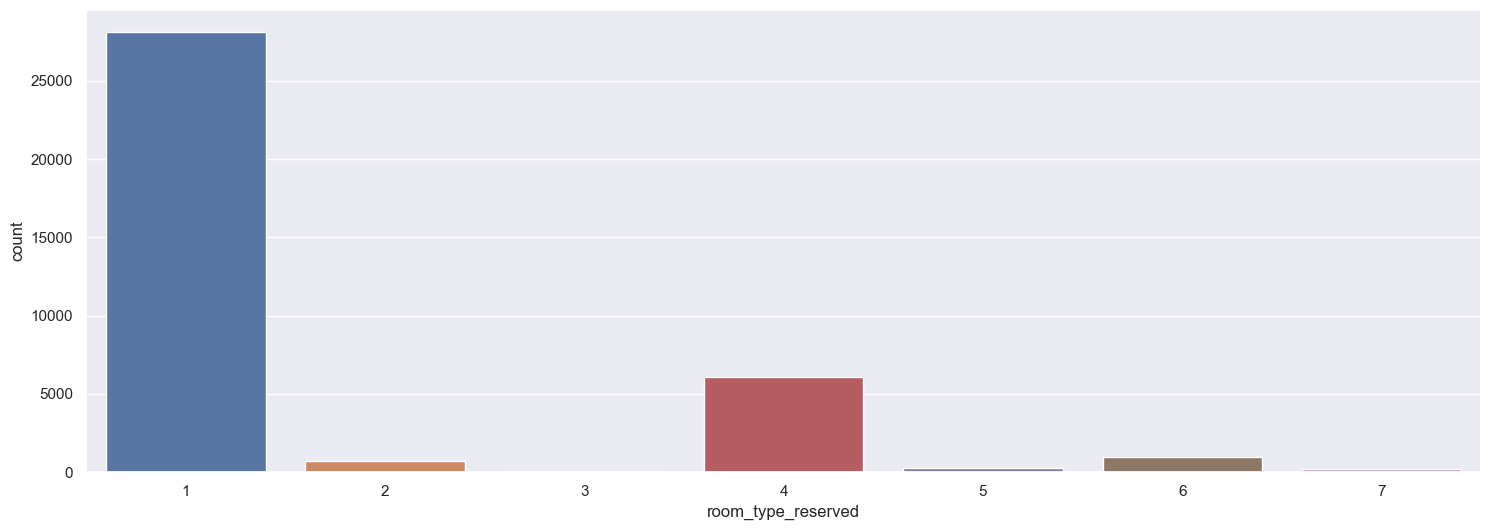

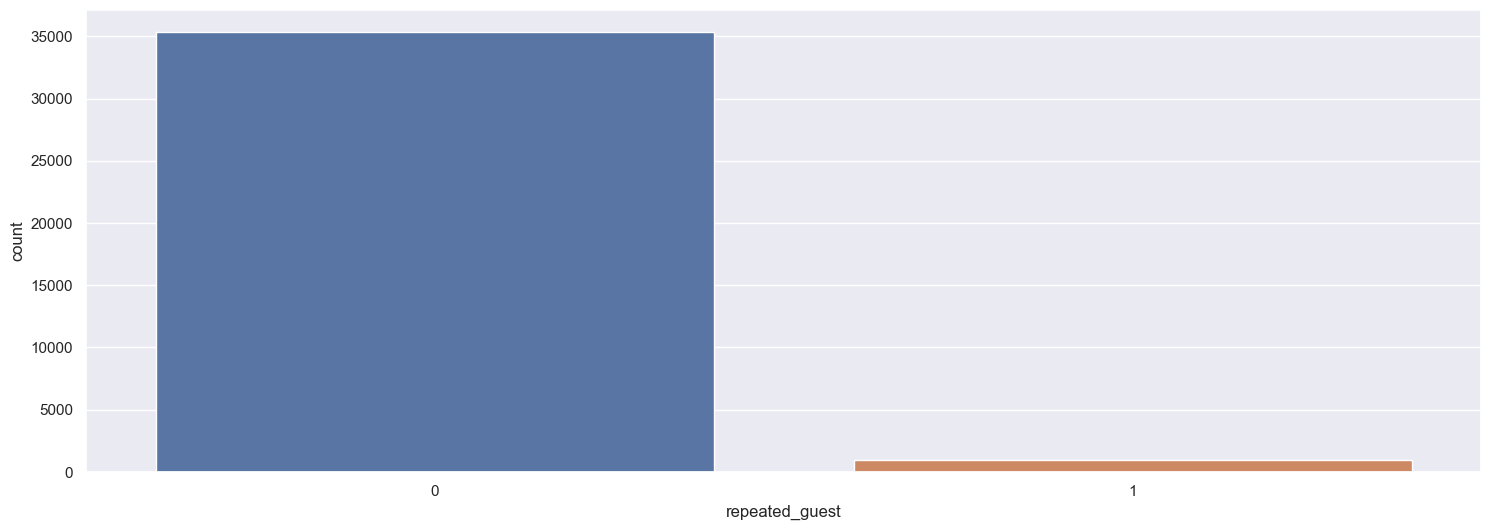

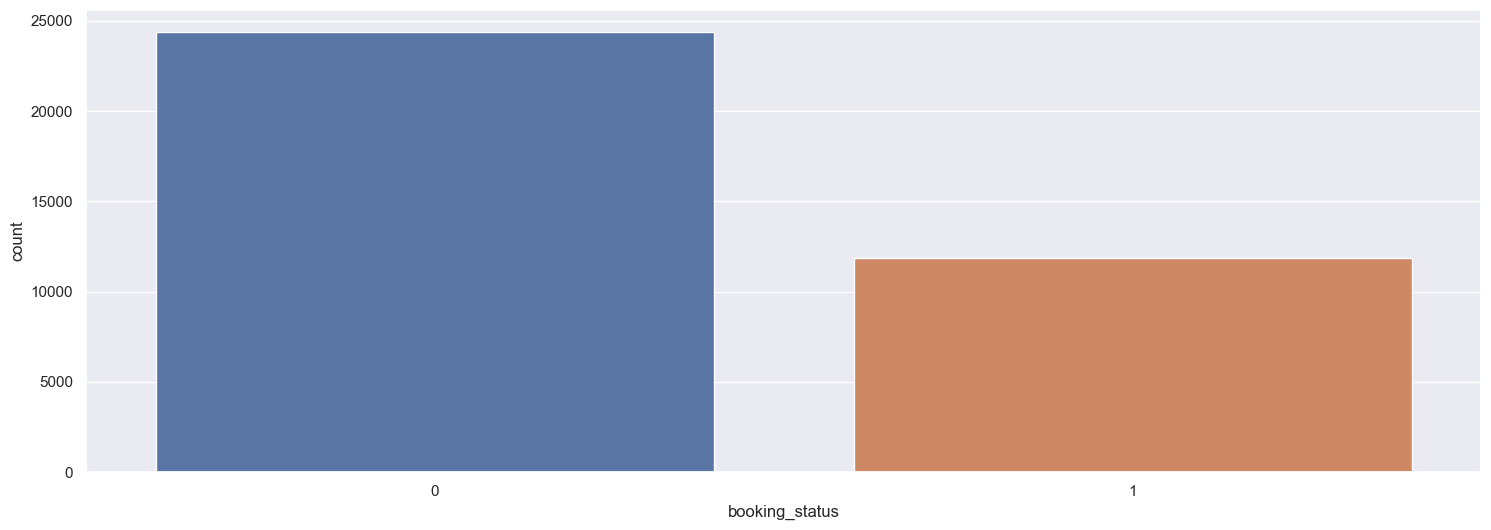

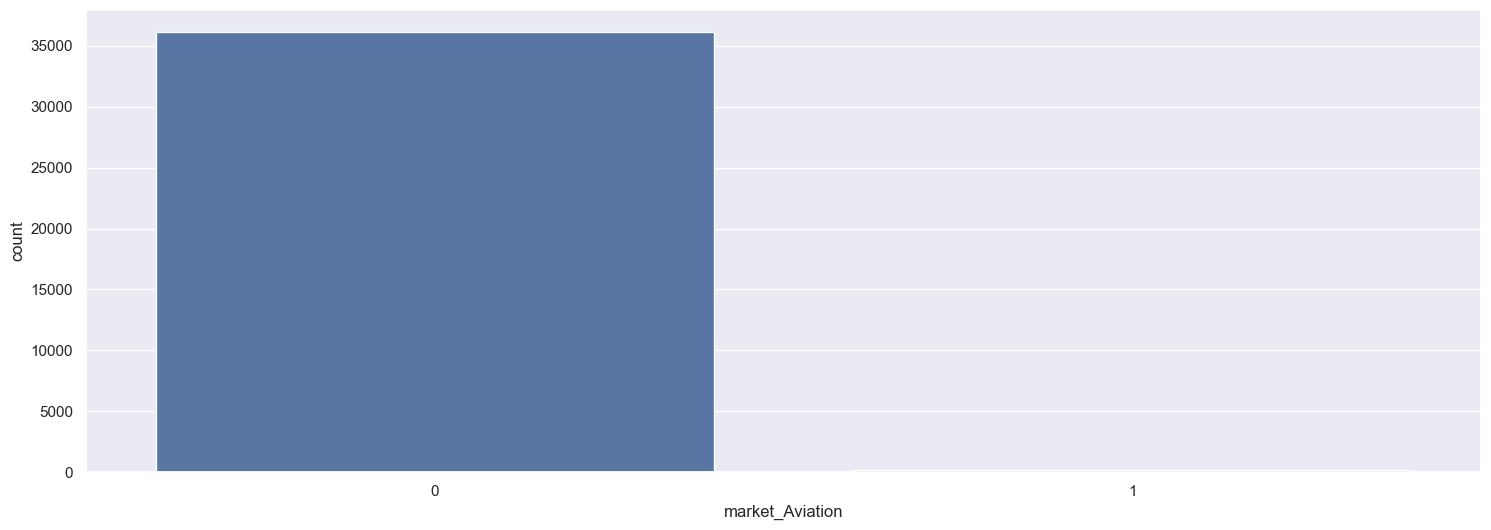

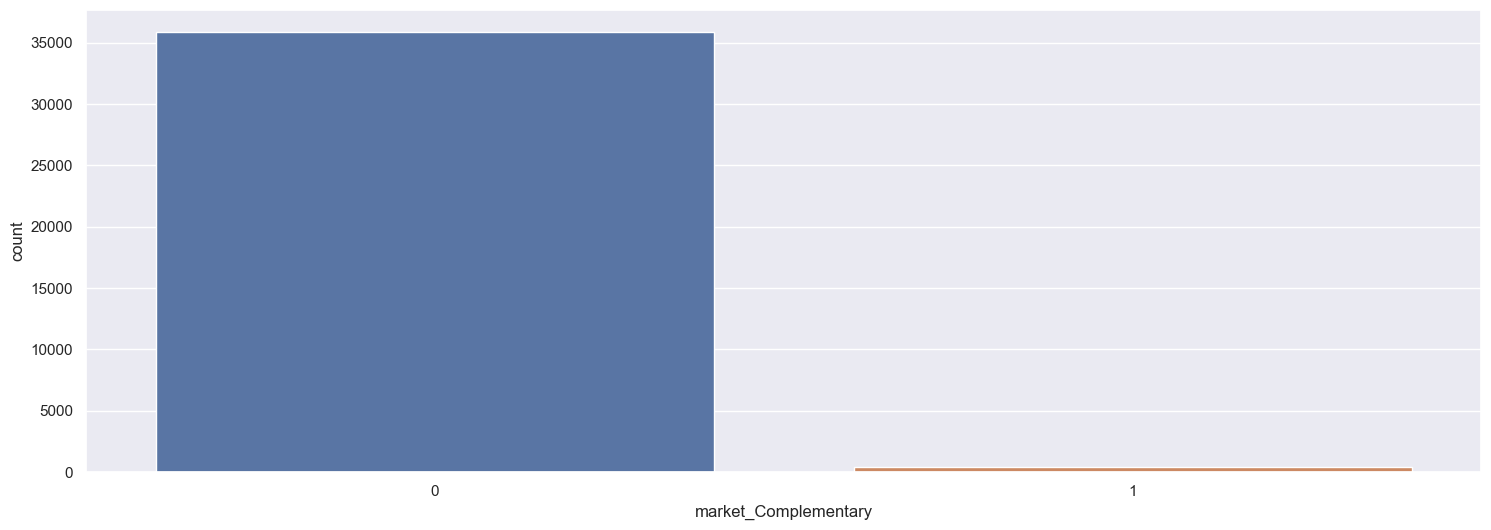

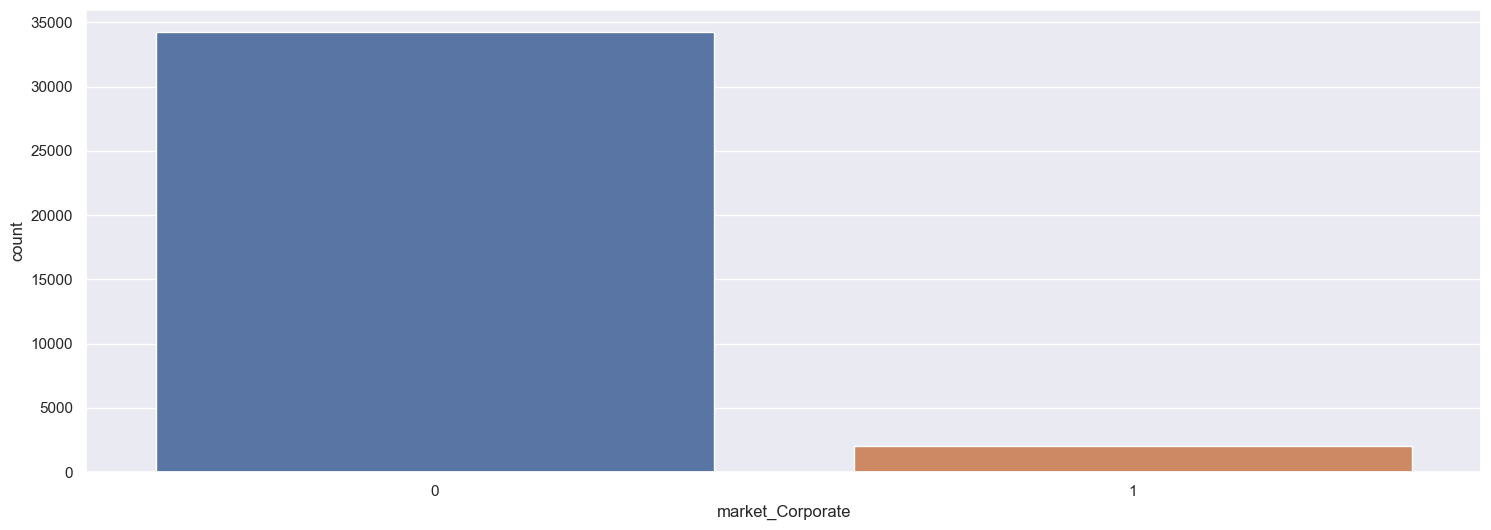

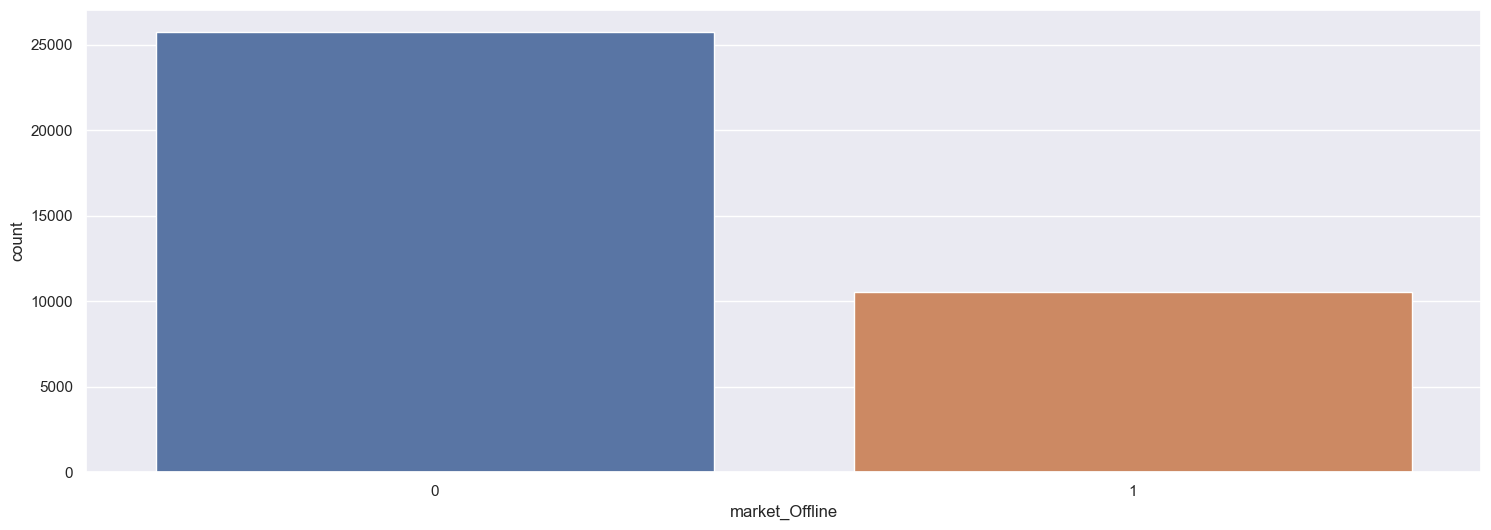

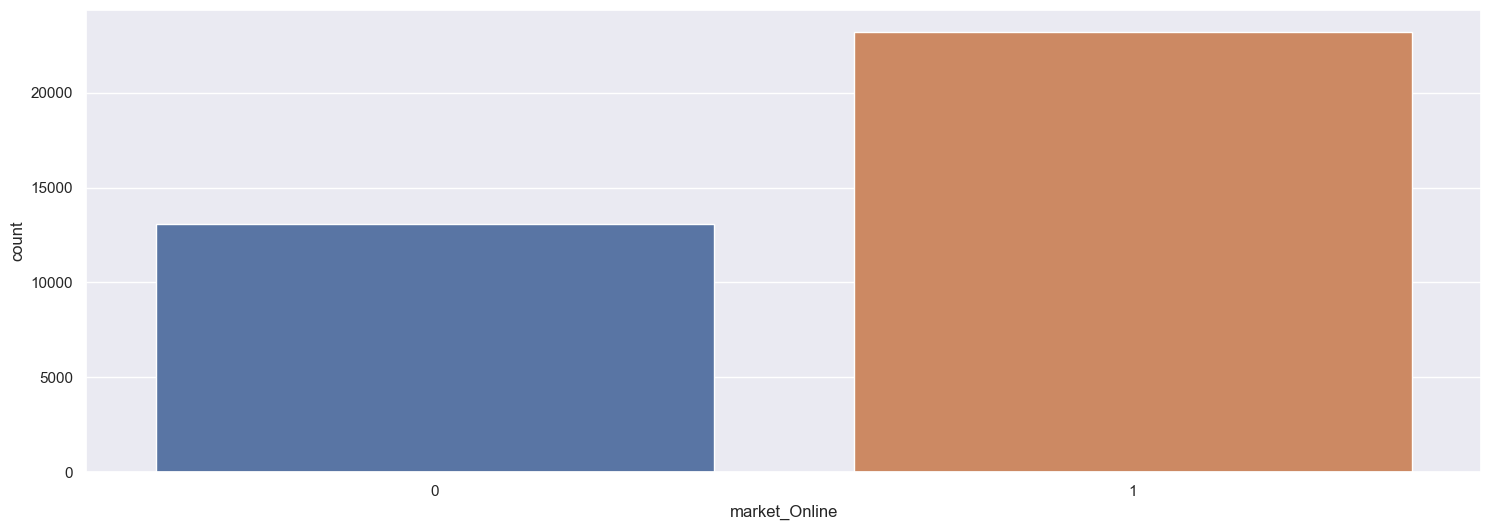

In [115]:
for i in hotel_cuali:
    plt.figure(figsize=(18, 6))
    sns.countplot(x =i, data = hotel, palette = 'deep')
    sns.set(font_scale = 1)
    plt.show()  

Analizaremos con profundidad algunas variables vistas previamente.

In [116]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 10987 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36275 non-null  int64         
 1   no_of_children                        36275 non-null  int64         
 2   no_of_weekend_nights                  36275 non-null  int64         
 3   no_of_week_nights                     36275 non-null  int64         
 4   type_of_meal_plan                     36275 non-null  object        
 5   required_car_parking_space            36275 non-null  object        
 6   room_type_reserved                    36275 non-null  object        
 7   lead_time                             36275 non-null  int64         
 8   arrival_year                          36275 non-null  int64         
 9   arrival_month                         36275 non-null  object        

##### Variable target "booking_status"

In [117]:
hotel['booking_status'].describe()

count     36275
unique        2
top           0
freq      24390
Name: booking_status, dtype: int64

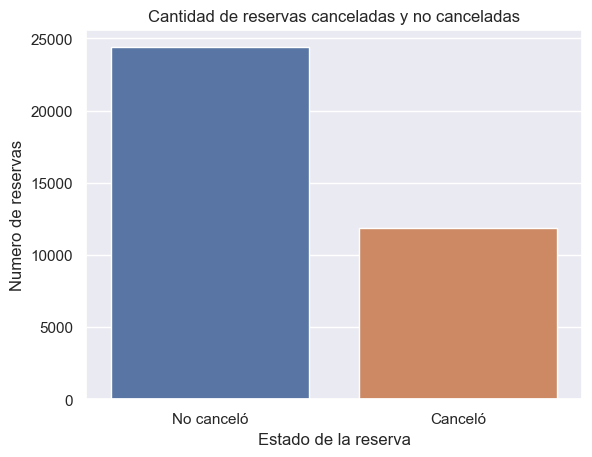

In [118]:
labels = ('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.countplot(data=hotel, x= "booking_status", palette='deep')
ax.set_xticklabels(labels)
ax.set_xlabel('Estado de la reserva')     #label x
ax.set_ylabel('Numero de reservas')     #label y
ax.set_title('Cantidad de reservas canceladas y no canceladas')  #título
plt.show()

In [119]:
hotel['booking_status'].value_counts().mul(100)/len(hotel)

0    67.236389
1    32.763611
Name: booking_status, dtype: float64

Como vemos, nuestra variable target "booking_status" muestra que el 67% de las reservas no fueron canceladas, mientras que el 37% si se cancelaron.

##### Variable "no_of_special_requests"

Tomaremos percentiles pequeños ya que los valores analizados son pequeños.

In [120]:
hotel['no_of_special_requests'].describe()

count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64

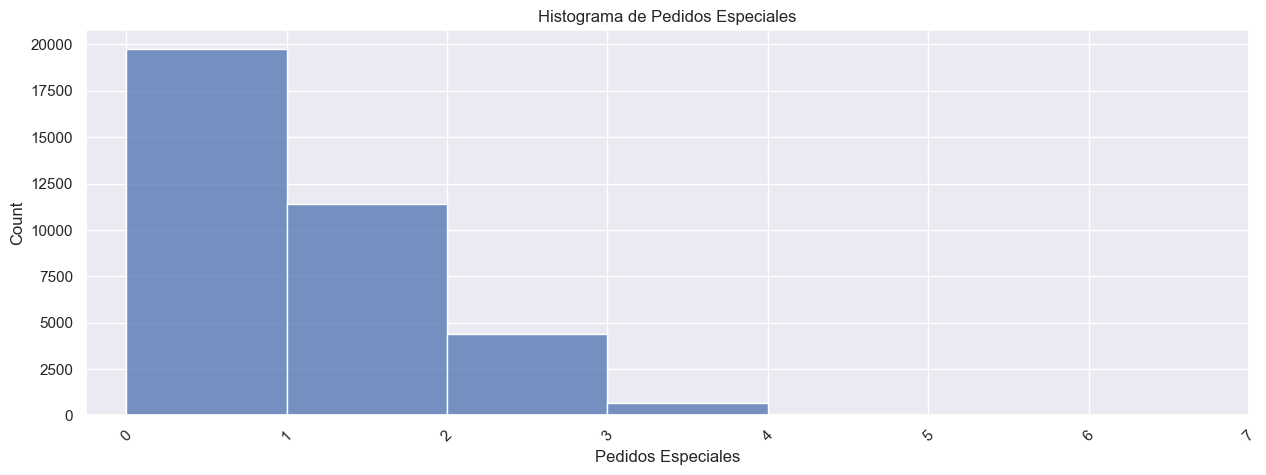

In [121]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.histplot(hotel.no_of_special_requests, binwidth= 1)
ax.set_xlabel('Pedidos Especiales')   
ax.set_title('Histograma de Pedidos Especiales')      
plt.xticks(np.arange(0, 8, 1), rotation = 45)
plt.show()

##### Variable "type_of_meal_plan"

In [122]:
hotel.type_of_meal_plan.value_counts()

1    27835
0     5130
2     3305
3        5
Name: type_of_meal_plan, dtype: int64

0 : Sin Comidas.    
1 : Solo Desayuno.  
2 : Media Pensión.  
3 : Pensión Completa

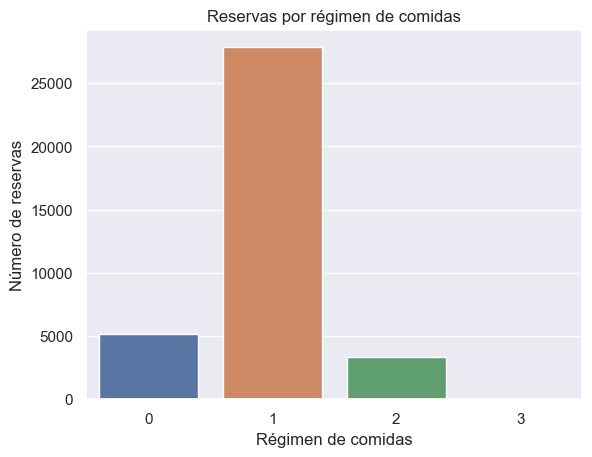

In [123]:
sns.set(font_scale=1)
ax = sns.countplot(data=hotel, x= "type_of_meal_plan", palette='deep', order=[0,1,2,3]) 
ax.set_xlabel('Régimen de comidas')    #label x
ax.set_ylabel('Número de reservas')     #label y
ax.set_title('Reservas por régimen de comidas')  #título       
plt.show()

In [124]:
hotel_meal = hotel.groupby(['type_of_meal_plan'])['type_of_meal_plan'].count()

In [125]:
hotel_meal = hotel.type_of_meal_plan.value_counts().mul(100)/len(hotel) 
hotel_meal

1    76.733287
0    14.141971
2     9.110958
3     0.013784
Name: type_of_meal_plan, dtype: float64

Mediante nuestro gráfico y calculos podemos determinar que el 77% de reservas aproximadamente las realizan con un plan de comidas de solo desayuno. En contra posición, vemos que el regimen completo de comidas solo se solicita con un 0.01% de reservas. Adicionalmente tenemos un 14% para las reservas sin plan de comidas y un 9% de reservas con media pensión.

##### Variable "no_of_adults"

Tomaremos percentiles pequeños ya que los valores analizados son pequeños.

In [126]:
hotel['no_of_adults'].describe(percentiles=[0.01, 0.1, .25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
1%           1.000000
10%          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
80%          2.000000
90%          2.000000
95%          3.000000
99%          3.000000
max          4.000000
Name: no_of_adults, dtype: float64

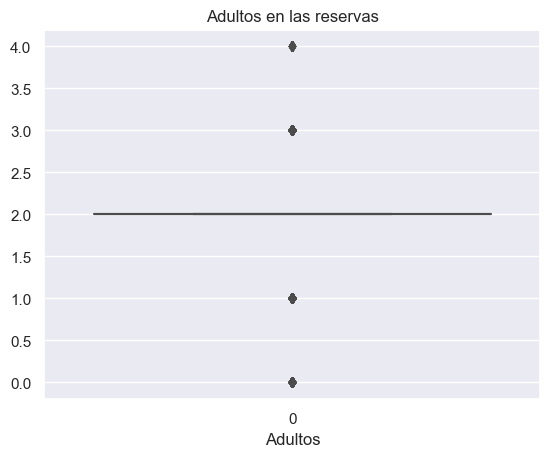

In [127]:
sns.set(font_scale=1)
ax = sns.boxplot(hotel.no_of_adults)
ax.set_xlabel('Adultos') 
ax.set_title('Adultos en las reservas') 
plt.show()

Vemos en la estadistica que el 90% de las reservas son para 2 adultos, lo que nos lleva a ver una caja muy colapsada sobre ese valor.
Los valores menores o mayores a 2 son vistos como outliers.

##### Variable "arrival_month"

In [128]:
hotel['arrival_month'].describe()

count       36275
unique         12
top       Octubre
freq         5317
Name: arrival_month, dtype: object

In [129]:
hotel['arrival_month'].unique()

array(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio',
       'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'],
      dtype=object)

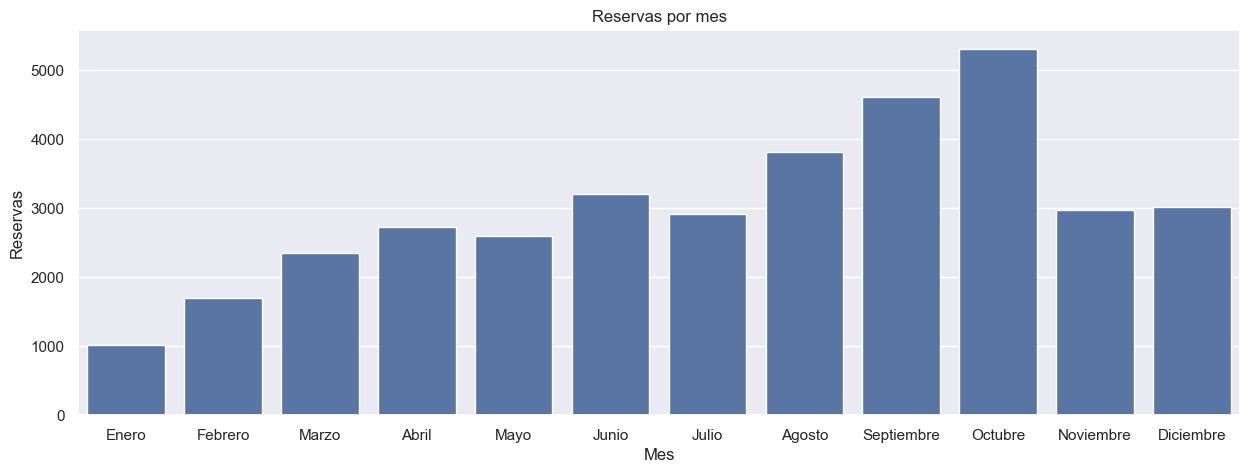

In [130]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.set(font_scale=1)
ax = sns.countplot(data=hotel, x= "arrival_month", palette= None, color = '#4c72b0')
ax.set_xlabel('Mes')    
ax.set_ylabel('Reservas')     
ax.set_title('Reservas por mes')       
plt.show()

A partir de la gráfica vemos como desde Enero a Abril las reservas van en aumento, para luego mantener una cierta estacionalidad hasta Agosto, mes donde se disparan las reservas en coincidencia con el verano europeo. Este crecimiento se mantiene hasta Octubre, y a partir de Noviembre las reservas caen practicamente a la mitad motivados por las festividades y la epoca invernal.

#### Analisis Bivariado

##### Tasa de Cancelación

In [131]:
hotel_pivot = pd.pivot_table(hotel.reset_index(), columns=['arrival_month', 'arrival_year'], 
        index=['booking_status'],
        values='index',
        aggfunc=len, margins=True, margins_name='subtotales')
hotel_pivot

arrival_month  Abril Agosto       Diciembre       Enero Febrero Julio        \
arrival_year    2018   2017  2018      2017  2018  2018    2018  2017  2018   
booking_status                                                                
0               1741    829  1496       906  1713   990    1274   120  1486   
1                995    185  1303        22   380    24     430   243  1071   
subtotales      2736   1014  2799       928  2093  1014    1704   363  2557   

arrival_month  Junio Marzo  Mayo Noviembre       Octubre       Septiembre  \
arrival_year    2018  2018  2018      2017  2018    2017  2018       2017   
booking_status                                                              
0               1912  1658  1650       620  1485    1611  1826       1467   
1               1291   700   948        27   848     302  1578        182   
subtotales      3203  2358  2598       647  2333    1913  3404       1649   

arrival_month        subtotales  
arrival_year    2018             
booking_status                   
0               1606      24390  
1               1356      11885  
subtotales      2962      36275

In [132]:
Tasa_cancelacion = (hotel_pivot.iloc[2] - hotel_pivot.iloc[0])/hotel_pivot.iloc[2]*100

hotel_cancelacion = pd.DataFrame(Tasa_cancelacion)
hotel_cancelacion.head()

0
arrival_month arrival_year           
Abril         2018          36.366959
Agosto        2017          18.244576
              2018          46.552340
Diciembre     2017           2.370690
              2018          18.155757

In [133]:
hotel_cancelacion = hotel_cancelacion.reset_index()        #reseteo el indice
hotel_cancelacion.rename({0: 'Porcentaje'}, axis=1, inplace=True)   # renombro columna
hotel_cancel=hotel_cancelacion.drop(hotel_cancelacion.index[-1])          # elimino ultima fila que tiene el subtotal (marginal)
hotel_cancel.tail()

,arrival_month,arrival_year,Porcentaje
13,Noviembre,2018,36.348050
14,Octubre,2017,15.786722
15,Octubre,2018,46.357227
16,Septiembre,2017,11.036992
17,Septiembre,2018,45.779878


In [134]:
# Diccionario con los nombres de los meses y su correspondiente formato en numeros
mes = { 'Enero':1,
        'Febrero':2,
        'Marzo':3,
        'Abril':4,
        'Mayo':5,
        'Junio':6,
        'Julio':7,
        'Agosto':8,
        'Septiembre':9,
        'Octubre':10,
        'Noviembre':11,
        'Diciembre':12
        }

In [135]:
hotel_cancel.replace({"arrival_month": mes}, inplace=True)                #reemplazo el mes en texto por numero (definido antes)
hotel_cancel['Date'] = pd.to_datetime({'year':hotel_cancel['arrival_year'],              #creo columna date y la convierto a datetime
                                    'month':hotel_cancel['arrival_month'],
                                    'day':1
                                    })
hotel_cancel = hotel_cancel.drop(['arrival_month', 'arrival_year'], axis=1)
hotel_cancel.head()

,Porcentaje,Date
0,36.366959,2018-04-01
1,18.244576,2017-08-01
2,46.552340,2018-08-01
3,2.370690,2017-12-01
4,18.155757,2018-12-01


In [136]:
hotel_cancel.dtypes

Porcentaje           float64
Date          datetime64[ns]
dtype: object

In [137]:
hotel_cancel = hotel_cancel.sort_values(by='Date', ascending=True) 
hotel_cancel.head()

,Porcentaje,Date
7,66.942149,2017-07-01
1,18.244576,2017-08-01
16,11.036992,2017-09-01
14,15.786722,2017-10-01
12,4.173107,2017-11-01


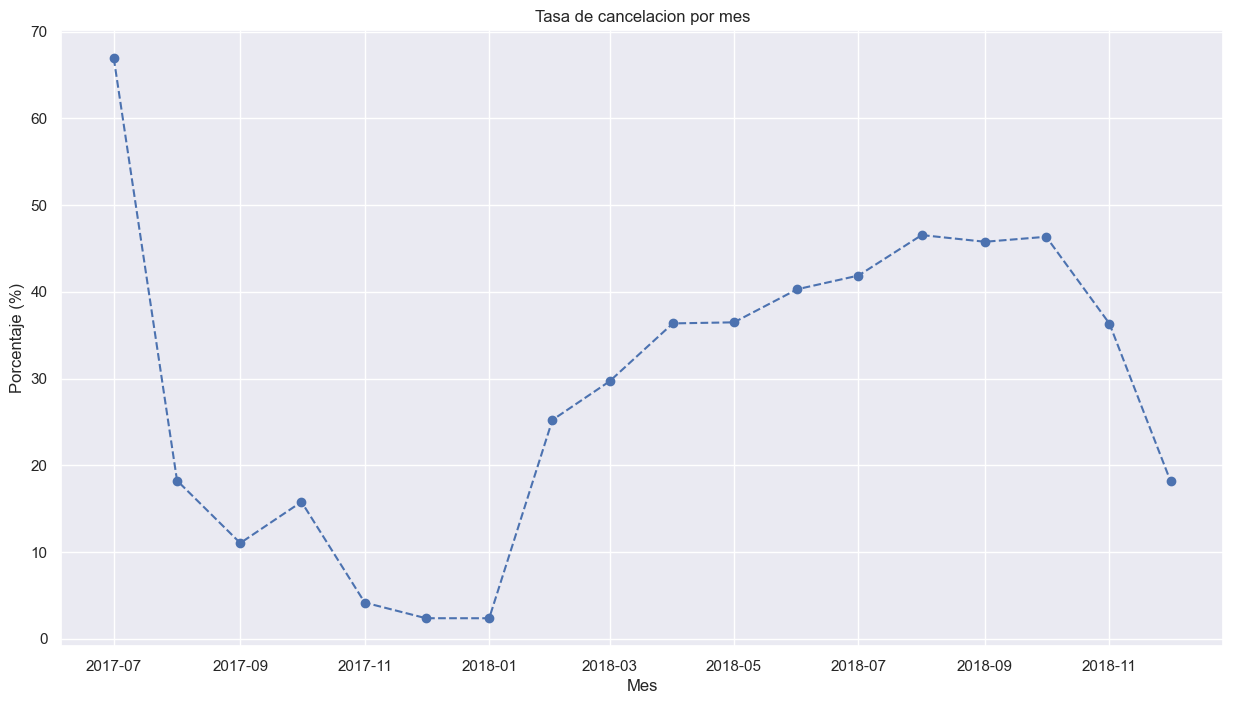

In [138]:
sns.set(font_scale=1)
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(hotel_cancel['Date'], hotel_cancel['Porcentaje'], marker='o', linestyle='--')
ax.set_title("Tasa de cancelacion por mes")
ax.set_xlabel("Mes")
ax.set_ylabel("Porcentaje (%)")
plt.show()

In [139]:
max_cancel = hotel_cancel['Porcentaje'].max()
min_cancel = hotel_cancel['Porcentaje'].min()
print('El porcentaje mínimo de cancelación es: ', min_cancel, ' y el máximo es ', max_cancel)

El porcentaje mínimo de cancelación es:  2.366863905325444  y el máximo es  66.94214876033058


Se calculó la tasa de cancelación de reservas por mes y se graficó para ver variaciones en el tiempo. El porcentaje varió entre el 2% y 67%. El valor más bajo se observa durante la mitad del primer año de registro y luego la tasa de cancelación aumenta oscilando entre el 25 y 50%. Este porcentaje de cancelaciones es considerado muy elevado y termina perjudicando el negocio hotelero.

##### Cancelación y mes de arribo

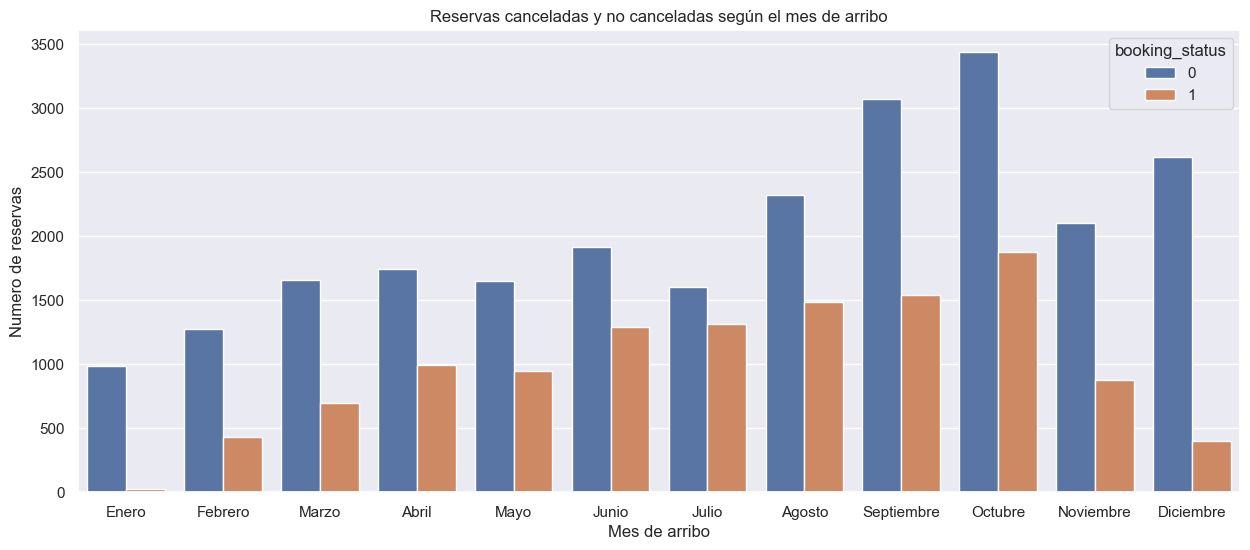

In [140]:
fig, cm = plt.subplots(figsize=(15,6)) 
sns.set(font_scale=1)
cm = sns.countplot(x = hotel['arrival_month'], data = hotel, hue='booking_status')
cm.set_xlabel('Mes de arribo')
cm.set_ylabel('Numero de reservas')     
cm.set_title('Reservas canceladas y no canceladas según el mes de arribo')    
plt.show()

##### Cancelación y segmento de mercado

In [141]:
hotel_aviat = pd.crosstab(hotel.booking_status, hotel.market_Aviation, normalize='columns')
hotel_aviat

market_Aviation,0,1
booking_status,,
0,0.672254,0.704
1,0.327746,0.296


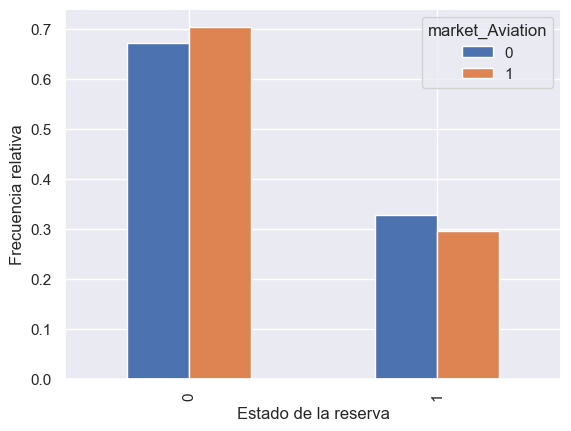

In [142]:
hotel_aviat.plot(kind='bar', stacked=False, color =['#4c72b0', '#dd8452', '#55a868', '#c44e52']) 
ax.set(facecolor = "grey")
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [143]:
hotel_compl = pd.crosstab(hotel.booking_status, hotel.market_Complementary, normalize='columns')
hotel_compl

market_Complementary,0,1
booking_status,,
0,0.668794,1.0
1,0.331206,0.0


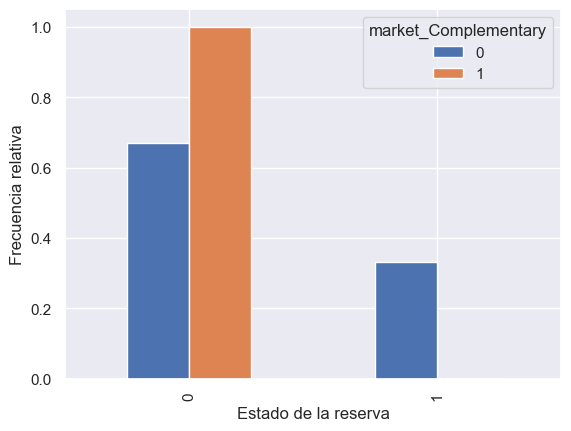

In [144]:
hotel_compl.plot(kind='bar', stacked=False, color =['#4c72b0', '#dd8452', '#55a868', '#c44e52']) 
ax.set(facecolor = "grey")
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [145]:
hotel_corpo = pd.crosstab(hotel.booking_status, hotel.market_Corporate, normalize='columns')
hotel_corpo

market_Corporate,0,1
booking_status,,
0,0.659496,0.890927
1,0.340504,0.109073


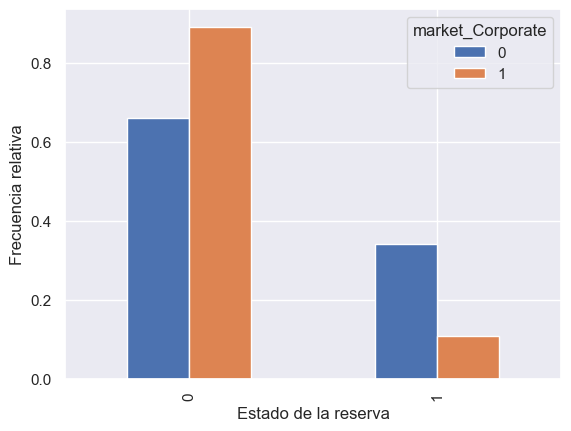

In [146]:
hotel_corpo.plot(kind='bar', stacked=False, color =['#4c72b0', '#dd8452', '#55a868', '#c44e52']) 
ax.set(facecolor = "grey")
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [147]:
hotel_offline = pd.crosstab(hotel.booking_status, hotel.market_Offline, normalize='columns')
hotel_offline

market_Offline,0,1
booking_status,,
0,0.660854,0.700513
1,0.339146,0.299487


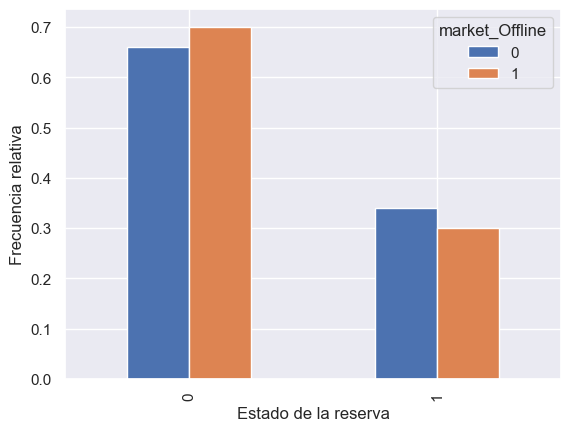

In [148]:
hotel_offline.plot(kind='bar', stacked=False, color =['#4c72b0', '#dd8452', '#55a868', '#c44e52']) 
ax.set(facecolor = "grey")
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

In [149]:
hotel_online = pd.crosstab(hotel.booking_status, hotel.market_Online, normalize='columns')
hotel_online

market_Online,0,1
booking_status,,
0,0.738917,0.634919
1,0.261083,0.365081


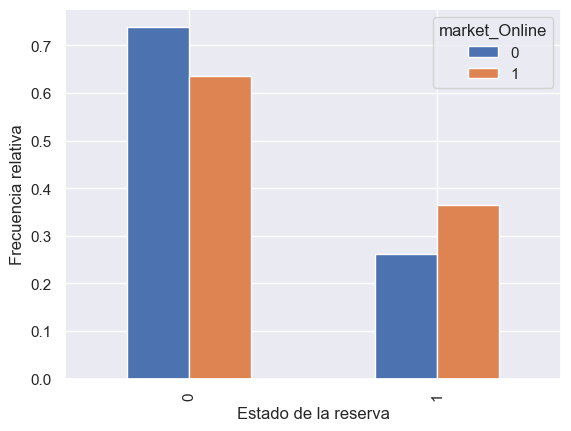

In [150]:
hotel_online.plot(kind='bar', stacked=False, color =['#4c72b0', '#dd8452', '#55a868', '#c44e52']) 
ax.set(facecolor = "grey")
plt.grid(color = 'w')
plt.xlabel ('Estado de la reserva')
plt.ylabel ('Frecuencia relativa')
plt.show()

##### Cancelación y lead time

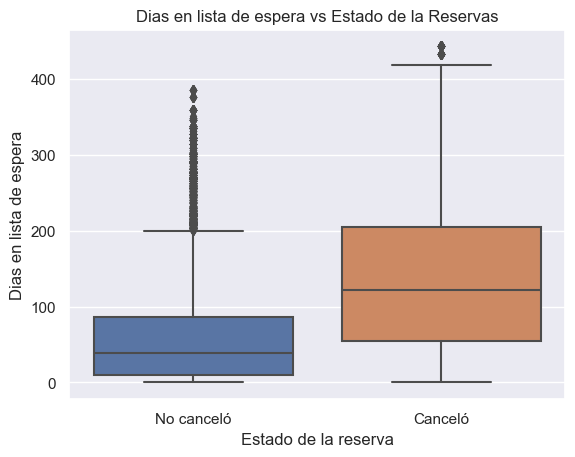

In [151]:
cl = sns.boxplot(x = "booking_status", y ="lead_time", data = hotel) 
sns.set(font_scale=1)
cl.set_xlabel('Estado de la reserva')
cl.set_xticklabels(labels)
cl.set_ylabel('Dias en lista de espera')    
cl.set_title('Dias en lista de espera vs Estado de la Reservas')      
plt.show()

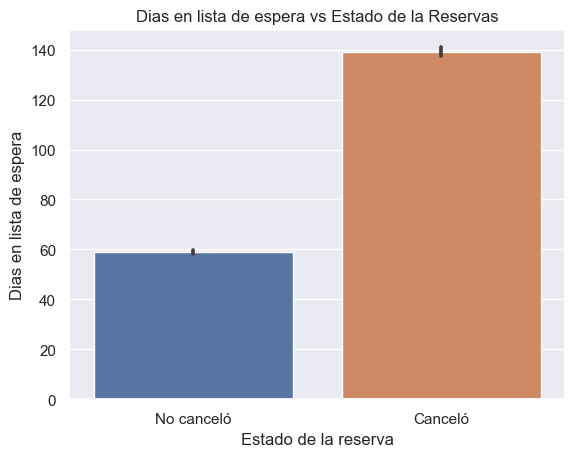

In [152]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='booking_status', y='lead_time', data=hotel) 
ax.set_xticklabels(labels)
ax.set_title('Dias en lista de espera vs Estado de la Reservas')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Dias en lista de espera')
plt.show()

Se observa que las personas que cancelaron la reserva tuvieron más tiempo de espera para reservar que los clientes que no cancelaron.

##### Cancelacion y requisito de estacionamiento

In [153]:
hotel.required_car_parking_space.value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

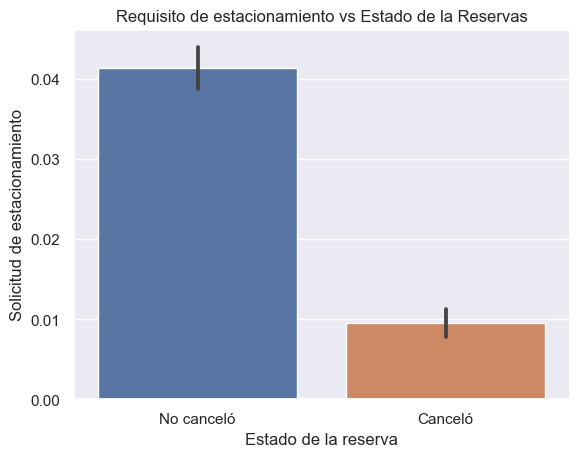

In [154]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='booking_status', y='required_car_parking_space', data=hotel) 
ax.set_xticklabels(labels)
ax.set_title('Requisito de estacionamiento vs Estado de la Reservas')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Solicitud de estacionamiento')
plt.show()

Vemos que la gran mayoria de las personas que solicitaron lugar de estacionamiento con su reserva no cancelaron la misma.

##### Cancelación y total de noches

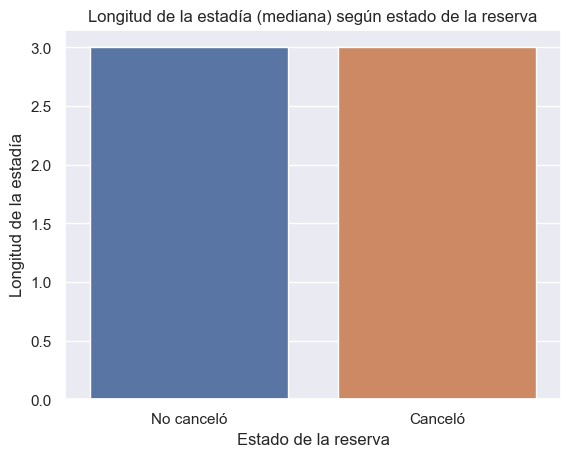

In [155]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='booking_status', y='total_nights', data=hotel, estimator = median)
ax.set_xticklabels(labels)
ax.set_title('Longitud de la estadía (mediana) según estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Longitud de la estadía')
plt.show()

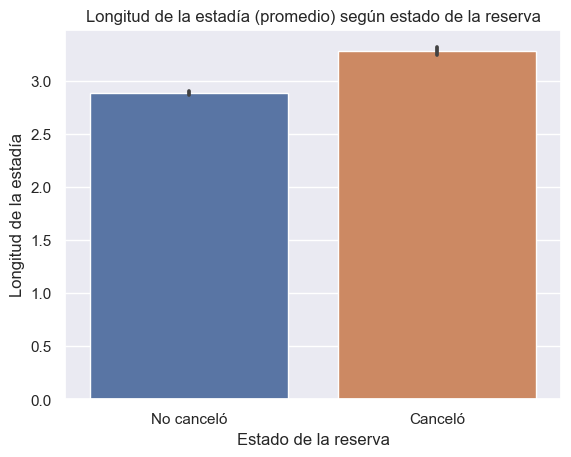

In [156]:
labels=('No canceló', 'Canceló')
sns.set(font_scale=1)
ax = sns.barplot(x='booking_status', y='total_nights', data=hotel)
ax.set_xticklabels(labels)
ax.set_title('Longitud de la estadía (promedio) según estado de la reserva')
ax.set_xlabel('Estado de la reserva')
ax.set_ylabel('Longitud de la estadía')
plt.show()

La mediana y el promedio de la longitud de la estadía en días de semana no se verian relacionadas con la probabilidad de cancelar ya que son similares en ambos grupos. 

#### Análisis Multivariado

In [157]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 10987 to 36274
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36275 non-null  int64         
 1   no_of_children                        36275 non-null  int64         
 2   no_of_weekend_nights                  36275 non-null  int64         
 3   no_of_week_nights                     36275 non-null  int64         
 4   type_of_meal_plan                     36275 non-null  object        
 5   required_car_parking_space            36275 non-null  object        
 6   room_type_reserved                    36275 non-null  object        
 7   lead_time                             36275 non-null  int64         
 8   arrival_year                          36275 non-null  int64         
 9   arrival_month                         36275 non-null  object        

##### *Correlación entre variables cuantitativas según variable target "booking_status"*

In [160]:
hotel_cuant= hotel.select_dtypes(include=np.number)
hotel_cuant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 10987 to 36274
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   lead_time                             36275 non-null  int64  
 5   arrival_year                          36275 non-null  int64  
 6   arrival_date                          36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  total_peopl

In [161]:
status=hotel['booking_status']
status

10987    0
14608    0
28442    0
6754     0
23530    0
        ..
22512    0
22503    0
22492    0
22614    0
36274    0
Name: booking_status, Length: 36275, dtype: object

In [162]:
hotel_cuant['status']=status
hotel_cuant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36275 entries, 10987 to 36274
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   lead_time                             36275 non-null  int64  
 5   arrival_year                          36275 non-null  int64  
 6   arrival_date                          36275 non-null  int64  
 7   no_of_previous_cancellations          36275 non-null  int64  
 8   no_of_previous_bookings_not_canceled  36275 non-null  int64  
 9   avg_price_per_room                    36275 non-null  float64
 10  no_of_special_requests                36275 non-null  int64  
 11  total_peopl

In [163]:
sns.pairplot(hotel_cuant, hue='status')

### Correlación de las variables

C:\Users\daru3\AppData\Local\Temp\ipykernel_15228\1125986832.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = hotel.corr().round(2)


<Axes: >

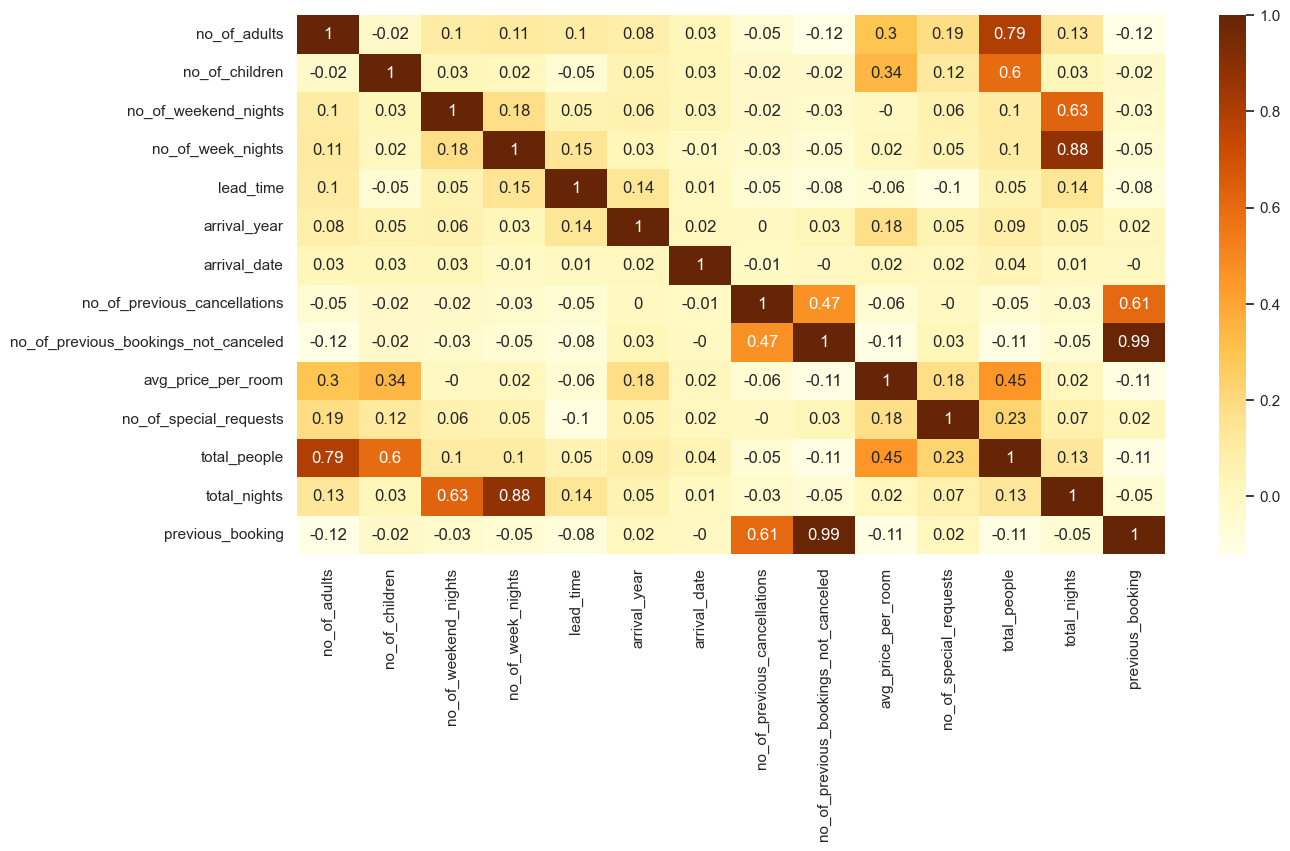

In [158]:
correlation = hotel.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

No se visualiza una correlación muy fuerte entre las variables, y las que se visualizan es porque estan derivadas de otras variable (por ejemplo total_nights con no_of_weekend_nights). Se mantienen momentaneamente para realizar el análisis.

## Storytelling

La industria hotelera es una de las más afectadas en cuanto a cancelación de reservas se refiere. Los hoteles pueden disminuir significativamente sus ingresos cuando los viajeros cancelan las resevas en situaciones que no les permiten completar las habitaciones nuevas con nuevos huespedes. Al privarse de vender estas habitaciones, como se mencionaba anteriormente , la rentabilidad de los hoteles disminuye ya que se generan costos adicionales para huespedes que no cumpliran con la reserva.
Poder establecer un modelo que ayude a predecir las reservas que se cancelarán es una condicion sine qua non para mejorar la rentabilidad y eficiencia del negocio.

El set de datos incluye cerca de 36000 reservas entre canceladas y no canceladas junto con variables referidas a los huespedes, a las características que ofrece el hotel, e información específica de las reservas. Este dataset nos pormitira desarrollar a futuro un modelo de predicción que nos permita asistir a la industria hotelera.

Se identificaron algunas relaciones entre el estado de la reserva y ciertas variables:

* A mayor dias de espera para la llegada al hotel, mayor tasa de cancelaciones.
* El segmento de mercado "Complementary" no registra cancelaciones
* Las solicitudes de espacio de estacionamiento no registran cancelaciones de reservas
* Julio es el mes donde se registran mayor cantidad de cancelaciones en relación a la cantidad de reservas realizadas
* A mayores requerimientos especiales menor es la tasa de cancelaciones
* El indice de huespedes recurrentes es muy bajo.
* Se suma el total de adultos y niños.
* Se suman las noches de la semana y el fin de semana
* El regimen de comidas 2 registra una tasa de cancelación similar a las no canceladas.
* Las reservas de habitación tipo 1 son la de mayor cantidad de reservas.

Todas las variables se incluiran en el dataset para el armado del futuro modelo de clasificación a excepción de:

* Date por ser de tipo datetime.